# Credit EDA Case Study
### *by-* Prabhudatt Agrawal
### November, 2021

We understand risk analysis through Exploratory Data Analysis and identify various factors that can proove to be helpful in minimizing the risk to loose money when lending to a customer. The framework is as follows:

**Part A: Data Quality Check**<br>
**Part A.1**, we identify the missing data and approach to deal with them. **Part A.2**, we identidy outliers in the variables and approach to deal with them. **Part A.3**, data imbalance and other things are dealt with.

**Part B: Exploratory Data Analysis**<br> 
**Part B.1**, we explain the results of our univariate, segmented univariate and bivariate analysis. **Part B.2**, we perform statistical correlation analysis to explain the relationship between different factors.

**Insights**<br>

## Part A: Data Quality Check

## A.1 Identifying missing data and dealing with them

## A.1.1. Importing Libraries and CSV files

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import plotly
from scipy.stats import boxcox
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [3]:
#Current Applications
application_data = pd.read_csv("application_data.csv")

In [4]:
application_data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
application_data.shape

(307511, 122)

In [6]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
previous_application= pd.read_csv('previous_application.csv')

In [8]:
previous_application.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


In [9]:
previous_application.shape

(1670214, 37)

In [10]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [11]:
# Percentage of null values in each column of application_data
ad_null_percentage = (application_data.isnull().sum()/len(application_data)*100).round(2)
ad_null_percentage.sort_values(ascending= False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [12]:
# Percentage of null values in each column of previous_application
pa_null_percentage = (previous_application.isnull().sum()/len(previous_application)*100).round(2)
pa_null_percentage.sort_values(ascending= False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

## A.1.2. First Impression of the data

In both application_data and previous_application there are many columns with high percentage of null values.

In previous_application, the *RATE_INTEREST_PRIVILEGED* and *RATE_INTEREST_PRIMARY* columns have 99.64% and 99.64% null values which is very high. Hence, we will be removing them from futher analysis.

Now, for **application_data**, we will check the correlation of coloumns to **TARGET** and then decide.

In [13]:
application_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### XNA are not known genders

#### Cheching for outliers in all the colums with >30% null values and their correlation with Targetr

In [14]:
target_ad= application_data.TARGET
target_ad

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

#### COMMONAREA_AVG

In [15]:
ad_commonarea_avg_filter= application_data.COMMONAREA_AVG[~application_data.COMMONAREA_AVG.isnull()]
ad_commonarea_avg_filter

0         0.0143
1         0.0605
13        0.0582
14        0.1143
18        0.0018
           ...  
307505    0.1432
307506    0.0202
307507    0.0022
307508    0.0123
307510    0.0176
Name: COMMONAREA_AVG, Length: 92646, dtype: float64

In [16]:
ad_commonarea_avg_filter.isnull().sum()

0

In [17]:
ad_commonarea_avg_filter.corr(target_ad,method= 'pearson')

-0.018549661629760364

#### COMMONAREA_MEDI

In [18]:
ad_commonarea_medi_filter= application_data.COMMONAREA_MEDI[~application_data.COMMONAREA_MEDI.isnull()]
ad_commonarea_medi_filter

0         0.0144
1         0.0608
13        0.0585
14        0.1150
18        0.0018
           ...  
307505    0.1441
307506    0.0203
307507    0.0022
307508    0.0124
307510    0.0177
Name: COMMONAREA_MEDI, Length: 92646, dtype: float64

In [19]:
ad_commonarea_medi_filter.isnull().sum()

0

In [20]:
ad_commonarea_medi_filter.corr(target_ad,method= 'pearson')

-0.01857286890771095

#### APARTMENTS_MODE

In [21]:
ad_apartments_mode_filter= application_data.APARTMENTS_MODE[~application_data.APARTMENTS_MODE.isnull()]
ad_apartments_mode_filter

0         0.0252
1         0.0924
12        0.0840
13        0.1502
14        0.3561
           ...  
307506    0.1008
307507    0.0252
307508    0.1050
307509    0.0126
307510    0.0756
Name: APARTMENTS_MODE, Length: 151450, dtype: float64

In [22]:
ad_apartments_mode_filter.isnull().sum()

0

In [23]:
ad_apartments_mode_filter.corr(target_ad,method= 'pearson')

-0.027283870667753174

#### NONLIVINGAPARTMENTS_AVG

In [24]:
ad_nonlivingapartments_avg_filter= application_data.NONLIVINGAPARTMENTS_AVG[~application_data.NONLIVINGAPARTMENTS_AVG.isnull()]
ad_nonlivingapartments_avg_filter

0         0.0000
1         0.0039
13        0.0000
14        0.0193
18        0.0000
           ...  
307495    0.0039
307505    0.0154
307506    0.0753
307507    0.0000
307508    0.0000
Name: NONLIVINGAPARTMENTS_AVG, Length: 93997, dtype: float64

In [25]:
ad_nonlivingapartments_avg_filter.isnull().sum()

0

In [26]:
ad_nonlivingapartments_avg_filter.corr(target_ad,method= 'pearson')

-0.003176107520726149

#### NONLIVINGAPARTMENTS_MEDI

In [27]:
ad_nonlivingapartments_medi_filter= application_data.NONLIVINGAPARTMENTS_MEDI[~application_data.NONLIVINGAPARTMENTS_MEDI.isnull()]
ad_nonlivingapartments_medi_filter

0         0.0000
1         0.0039
13        0.0000
14        0.0194
18        0.0000
           ...  
307495    0.0039
307505    0.0155
307506    0.0757
307507    0.0000
307508    0.0000
Name: NONLIVINGAPARTMENTS_MEDI, Length: 93997, dtype: float64

In [28]:
ad_nonlivingapartments_medi_filter.isnull().sum()

0

In [29]:
ad_nonlivingapartments_medi_filter.corr(target_ad,method= 'pearson')

-0.0027571486021083337

#### LIVINGAPARTMENTS_MODE

In [30]:
ad_nonlivingapartments_mode_filter= application_data.LIVINGAPARTMENTS_MODE[~application_data.LIVINGAPARTMENTS_MODE.isnull()]
ad_nonlivingapartments_mode_filter

0         0.0220
1         0.0790
13        0.1313
14        0.3113
18        0.0248
           ...  
307495    0.0652
307505    0.1928
307506    0.0882
307507    0.0220
307508    0.0918
Name: LIVINGAPARTMENTS_MODE, Length: 97312, dtype: float64

In [31]:
ad_nonlivingapartments_mode_filter.isnull().sum()

0

In [32]:
ad_nonlivingapartments_mode_filter.corr(target_ad,method= 'pearson')

-0.023393245570197466

#### LIVINGAPARTMENTS_AVG

In [33]:
ad_livingapartments_avg_filter= application_data.LIVINGAPARTMENTS_AVG[~application_data.LIVINGAPARTMENTS_AVG.isnull()]
ad_livingapartments_avg_filter

0         0.0202
1         0.0773
13        0.1202
14        0.2849
18        0.0227
           ...  
307495    0.0597
307505    0.1765
307506    0.1484
307507    0.0202
307508    0.0841
Name: LIVINGAPARTMENTS_AVG, Length: 97312, dtype: float64

In [34]:
ad_livingapartments_avg_filter.isnull().sum()

0

In [35]:
ad_livingapartments_avg_filter.corr(target_ad,method= 'pearson')

-0.02503053329106436

#### LIVINGAPARTMENTS_MEDI

In [36]:
ad_livingapartments_medi_filter= application_data.LIVINGAPARTMENTS_MEDI[~application_data.LIVINGAPARTMENTS_MEDI.isnull()]
ad_livingapartments_medi_filter

0         0.0205
1         0.0787
13        0.1223
14        0.2899
18        0.0231
           ...  
307495    0.0607
307505    0.1796
307506    0.1509
307507    0.0205
307508    0.0855
Name: LIVINGAPARTMENTS_MEDI, Length: 97312, dtype: float64

In [37]:
ad_livingapartments_medi_filter.isnull().sum()

0

In [38]:
ad_livingapartments_medi_filter.corr(target_ad,method= 'pearson')

-0.024620663606504823

#### FLOORSMIN_AVG

In [39]:
ad_floorsmin_avg_filter= application_data.FLOORSMIN_AVG[~application_data.FLOORSMIN_AVG.isnull()]
ad_floorsmin_avg_filter

0         0.1250
1         0.3333
13        0.3750
14        0.7083
18        0.1250
           ...  
307498    0.7083
307505    0.3750
307506    0.2708
307507    0.1250
307508    0.2083
Name: FLOORSMIN_AVG, Length: 98869, dtype: float64

In [40]:
ad_floorsmin_avg_filter.isnull().sum()

0

In [41]:
ad_floorsmin_avg_filter.corr(target_ad,method= 'pearson')

-0.03361350325189986

#### FLOORSMIN_MODE

In [42]:
ad_floorsmin_mode_filter= application_data.FLOORSMIN_MODE[~application_data.FLOORSMIN_MODE.isnull()]
ad_floorsmin_mode_filter

0         0.1250
1         0.3333
13        0.3750
14        0.7083
18        0.1250
           ...  
307498    0.7083
307505    0.3750
307506    0.0417
307507    0.1250
307508    0.2083
Name: FLOORSMIN_MODE, Length: 98869, dtype: float64

In [43]:
ad_floorsmin_mode_filter.isnull().sum()

0

In [44]:
ad_floorsmin_mode_filter.corr(target_ad,method= 'pearson')

-0.03269782531047507

#### FLOORSMIN_MEDI

In [45]:
ad_floorsmin_medi_filter= application_data.FLOORSMIN_MEDI[~application_data.FLOORSMIN_MEDI.isnull()]
ad_floorsmin_medi_filter

0         0.1250
1         0.3333
13        0.3750
14        0.7083
18        0.1250
           ...  
307498    0.7083
307505    0.3750
307506    0.2708
307507    0.1250
307508    0.2083
Name: FLOORSMIN_MEDI, Length: 98869, dtype: float64

In [46]:
ad_floorsmin_medi_filter.isnull().sum()

0

In [47]:
ad_floorsmin_medi_filter.corr(target_ad)

-0.033394287191135394

#### YEARS_BUILD_MEDI

In [48]:
ad_years_build_medi_filter= application_data.YEARS_BUILD_MEDI[~application_data.YEARS_BUILD_MEDI.isnull()]
ad_years_build_medi_filter

0         0.6243
1         0.7987
13        0.7383
14        0.9799
18        0.8390
           ...  
307498    0.8524
307505    0.8121
307506    0.8323
307507    0.6310
307508    0.7518
Name: YEARS_BUILD_MEDI, Length: 103023, dtype: float64

In [49]:
ad_years_build_medi_filter.isnull().sum()

0

In [50]:
ad_years_build_medi_filter.corr(target_ad,method= 'pearson')

-0.02232592647747436

#### YEARS_BUILD_MODE

In [51]:
ad_years_build_mode_filter= application_data.YEARS_BUILD_MODE[~application_data.YEARS_BUILD_MODE.isnull()]
ad_years_build_mode_filter

0         0.6341
1         0.8040
13        0.7452
14        0.9804
18        0.8432
           ...  
307498    0.8563
307505    0.8171
307506    0.7125
307507    0.6406
307508    0.7583
Name: YEARS_BUILD_MODE, Length: 103023, dtype: float64

In [52]:
ad_years_build_mode_filter.isnull().sum()

0

In [53]:
ad_years_build_mode_filter.corr(target_ad,method= 'pearson')

-0.022068203834856547

#### YEARS_BUILD_AVG

In [54]:
ad_years_build_avg_filter= application_data.YEARS_BUILD_AVG[~application_data.YEARS_BUILD_AVG.isnull()]
ad_years_build_avg_filter

0         0.6192
1         0.7960
13        0.7348
14        0.9796
18        0.8368
           ...  
307498    0.8504
307505    0.8096
307506    0.8300
307507    0.6260
307508    0.7484
Name: YEARS_BUILD_AVG, Length: 103023, dtype: float64

In [55]:
ad_years_build_avg_filter.isnull().sum()

0

In [56]:
ad_years_build_avg_filter.corr(target_ad,method= 'pearson')

-0.022149284063388768

#### OWN_CAR_AGE

In [57]:
ad_own_car_age_filter= application_data.OWN_CAR_AGE[~application_data.OWN_CAR_AGE.isnull()]
ad_own_car_age_filter

2         26.0
6         17.0
7          8.0
13        23.0
15        17.0
          ... 
307492     2.0
307494    15.0
307495     2.0
307497     0.0
307498    10.0
Name: OWN_CAR_AGE, Length: 104582, dtype: float64

In [58]:
ad_own_car_age_filter.isnull().sum()

0

In [59]:
ad_own_car_age_filter.corr(target_ad,method= 'pearson')

0.03761156427516556

#### LANDAREA_MEDI

In [60]:
ad_landarea_medi_filter= application_data.LANDAREA_MEDI[~application_data.LANDAREA_MEDI.isnull()]
ad_landarea_medi_filter

0         0.0375
1         0.0132
12        0.0137
13        0.0947
14        0.1789
           ...  
307498    0.0000
307501    0.0146
307505    0.0874
307506    0.0605
307507    0.0589
Name: LANDAREA_MEDI, Length: 124921, dtype: float64

In [61]:
ad_landarea_medi_filter.isnull().sum()

0

In [62]:
ad_landarea_medi_filter.corr(target_ad,method= 'pearson')

-0.011255826639923505

#### LANDAREA_MODE

In [63]:
ad_landarea_mode_filter= application_data.LANDAREA_MODE[~application_data.LANDAREA_MODE.isnull()]
ad_landarea_mode_filter

0         0.0377
1         0.0128
12        0.0138
13        0.0952
14        0.1798
           ...  
307498    0.0000
307501    0.0147
307505    0.0879
307506    0.0094
307507    0.0592
Name: LANDAREA_MODE, Length: 124921, dtype: float64

In [64]:
ad_landarea_mode_filter.isnull().sum()

0

In [65]:
ad_landarea_mode_filter.corr(target_ad,method= 'pearson')

-0.010174103567660447

#### LANDAREA_AVG

In [66]:
ad_landarea_avg_filter= application_data.LANDAREA_AVG[~application_data.LANDAREA_AVG.isnull()]
ad_landarea_avg_filter

0         0.0369
1         0.0130
12        0.0135
13        0.0931
14        0.1758
           ...  
307498    0.0000
307501    0.0144
307505    0.0859
307506    0.0594
307507    0.0579
Name: LANDAREA_AVG, Length: 124921, dtype: float64

In [67]:
ad_landarea_avg_filter.isnull().sum()

0

In [68]:
ad_landarea_avg_filter.corr(target_ad,method= 'pearson')

-0.010884822678806682

#### BASEMENTAREA_MEDI

In [69]:
ad_basementarea_medi_filter= application_data.BASEMENTAREA_MEDI[~application_data.BASEMENTAREA_MEDI.isnull()]
ad_basementarea_medi_filter

0         0.0369
1         0.0529
13        0.0973
14        0.1335
18        0.0617
           ...  
307505    0.1638
307506    0.0887
307507    0.0435
307508    0.0862
307510    0.0526
Name: BASEMENTAREA_MEDI, Length: 127568, dtype: float64

In [70]:
ad_basementarea_medi_filter.isnull().sum()

0

In [71]:
ad_basementarea_medi_filter.corr(target_ad,method= 'pearson')

-0.02208126137318982

#### BASEMENTAREA_AVG

In [72]:
ad_basementarea_avg_filter= application_data.BASEMENTAREA_AVG[~application_data.BASEMENTAREA_AVG.isnull()]
ad_basementarea_avg_filter

0         0.0369
1         0.0529
13        0.0973
14        0.1335
18        0.0617
           ...  
307505    0.1638
307506    0.0887
307507    0.0435
307508    0.0862
307510    0.0526
Name: BASEMENTAREA_AVG, Length: 127568, dtype: float64

In [73]:
ad_basementarea_avg_filter.isnull().sum()

0

In [74]:
ad_basementarea_avg_filter.corr(target_ad,method= 'pearson')

-0.022745743190147934

#### BASEMENTAREA_MODE

In [75]:
ad_basementarea_mode_filter= application_data.BASEMENTAREA_MODE[~application_data.BASEMENTAREA_MODE.isnull()]
ad_basementarea_mode_filter

0         0.0383
1         0.0538
13        0.1010
14        0.1386
18        0.0640
           ...  
307505    0.1700
307506    0.0172
307507    0.0451
307508    0.0894
307510    0.0546
Name: BASEMENTAREA_MODE, Length: 127568, dtype: float64

In [76]:
ad_basementarea_mode_filter.isnull().sum()

0

In [77]:
ad_basementarea_mode_filter.corr(target_ad,method= 'pearson')

-0.01995228392431522

#### EXT_SOURCE_1

In [78]:
ad_ext_source_1_filter= application_data.EXT_SOURCE_1[~application_data.EXT_SOURCE_1.isnull()]
ad_ext_source_1_filter

0         0.083037
1         0.311267
6         0.774761
8         0.587334
10        0.319760
            ...   
307500    0.896042
307503    0.243466
307506    0.145570
307508    0.744026
307510    0.734460
Name: EXT_SOURCE_1, Length: 134133, dtype: float64

In [79]:
ad_ext_source_1_filter.isnull().sum()

0

In [80]:
ad_ext_source_1_filter.corr(target_ad,method= 'pearson')

-0.15531712606394854

#### NONLIVINGAREA_MODE

In [81]:
ad_nonlivingarea_mode_filter= application_data.NONLIVINGAREA_MODE[~application_data.NONLIVINGAREA_MODE.isnull()]
ad_nonlivingarea_mode_filter

0         0.0000
1         0.0000
12        0.0000
13        0.0000
14        0.1060
           ...  
307505    0.0088
307506    0.0125
307507    0.0000
307508    0.0000
307510    0.0000
Name: NONLIVINGAREA_MODE, Length: 137829, dtype: float64

In [82]:
ad_nonlivingarea_mode_filter.isnull().sum()

0

In [83]:
ad_nonlivingarea_mode_filter.corr(target_ad,method= 'pearson')

-0.012710543748878223

#### NONLIVINGAREA_AVG

In [84]:
ad_nonlivingarea_avg_filter= application_data.NONLIVINGAREA_AVG[~application_data.NONLIVINGAREA_AVG.isnull()]
ad_nonlivingarea_avg_filter

0         0.0000
1         0.0098
12        0.0000
13        0.0000
14        0.1001
           ...  
307505    0.0083
307506    0.1095
307507    0.0000
307508    0.0000
307510    0.0000
Name: NONLIVINGAREA_AVG, Length: 137829, dtype: float64

In [85]:
ad_nonlivingarea_avg_filter.isnull().sum()

0

In [86]:
ad_nonlivingarea_avg_filter.corr(target_ad,method= 'pearson')

-0.013578069781984826

#### NONLIVINGAREA_MEDI

In [87]:
ad_nonlivingarea_medi_filter= application_data.NONLIVINGAREA_MEDI[~application_data.NONLIVINGAREA_MEDI.isnull()]
ad_nonlivingarea_medi_filter

0         0.0000
1         0.0100
12        0.0000
13        0.0000
14        0.1022
           ...  
307505    0.0085
307506    0.1118
307507    0.0000
307508    0.0000
307510    0.0000
Name: NONLIVINGAREA_MEDI, Length: 137829, dtype: float64

In [88]:
ad_nonlivingarea_medi_filter.isnull().sum()

0

In [89]:
ad_nonlivingarea_medi_filter.corr(target_ad,method= 'pearson')

-0.013336719980273963

#### ELEVATORS_MEDI

In [90]:
ad_elevators_medi_filter= application_data.ELEVATORS_MEDI[~application_data.ELEVATORS_MEDI.isnull()]
ad_elevators_medi_filter

0         0.00
1         0.08
12        0.00
13        0.16
14        0.40
          ... 
307505    0.24
307506    0.22
307507    0.00
307508    0.00
307510    0.08
Name: ELEVATORS_MEDI, Length: 143620, dtype: float64

In [91]:
ad_elevators_medi_filter.isnull().sum()

0

In [92]:
ad_elevators_medi_filter.corr(target_ad, method= 'pearson')

-0.03386287676844591

#### Out of every variable with more than 40% null values non of them have significant correlation to the target

## A.1.3 Data Cleaning

In [93]:
application_data = application_data.replace('XNA', np.NaN)

### Modifying data types

In [94]:
#Checking the float type columns
application_data.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [95]:
#Converting these count columns to int64
column_to_convert = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
application_data.loc[:,column_to_convert]= application_data.loc[:, column_to_convert].apply(lambda col: col.astype('int32',errors='ignore'))

#### Now we will drop all coloums with correlation coefficient values less than +0.8 or greater than -0.8 as they are not considered significant.

#### Here, all the values with null value more than 40% are not significant coincidently.

In [96]:
def remove_null(dataframe, percent):
    ad = application_data.copy()
    ad_shape = ad.shape
    column_names = (ad.isnull().sum()/len(ad))
    column_names = list(column_names[column_names.values>=percent].index)
    ad.drop(labels = column_names, axis= 1, inplace=True)        
    print("Number of columns dropped:", len(column_names))    
    print("New dataset rows,columns are", ad.shape)
    return ad

In [97]:
application_data = remove_null(application_data, 0.40)

Number of columns dropped: 49
New dataset rows,columns are (307511, 73)


In [98]:
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,NaN,0

In [99]:
# Percentage of null values in each column of the new dataset
ad_null_percentage = (application_data.isnull().sum()/len(application_data)*100).round(2)
ad_null_percentage.sort_values(ascending= False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
ORGANIZATION_TYPE              18.01
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
NAME_TYPE_SUITE                 0.42
DEF_30_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_DOCUMENT_7                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_21                0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
L

#### As we do not have a Target variable in previous_application to check the corelation of other variables to it, we will let it be.

## A.1.4 Missing value treatment

#### Analylizing these columns one by one
    OCCUPATION_TYPE                 31.345545
    EXT_SOURCE_3                    19.825307
    AMT_REQ_CREDIT_BUREAU_QRT       13.501631
    AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
    AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
    AMT_REQ_CREDIT_BUREAU_MON       13.501631
    AMT_REQ_CREDIT_BUREAU_DAY       13.501631
    AMT_REQ_CREDIT_BUREAU_HOUR      13.501631

### A.1.4.1 Imputing missing values 

#### Imputing Occupation Type

In [100]:
# OCCUPATION_TYPE is a not continuous variable. We'll chechk for mode, and check for outliers
application_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [101]:
application_data.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

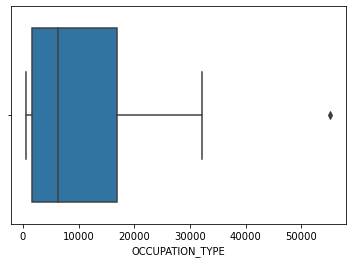

In [102]:
oc_ad= application_data.OCCUPATION_TYPE.value_counts()
sns.boxplot(oc_ad)
plt.show()

#### As there are very low outliers, we can replace the null with mode

In [103]:
application_data.OCCUPATION_TYPE = application_data.OCCUPATION_TYPE.replace(np.NaN,'Laborers')

In [104]:
application_data.OCCUPATION_TYPE.isnull().sum()

0

#### Imputing EXT_SOURCE_3

In [105]:
# OCCUPATION_TYPE is a continuous variable. We'll chechk for mean, median and mode, and check for outliers
application_data.EXT_SOURCE_3.value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

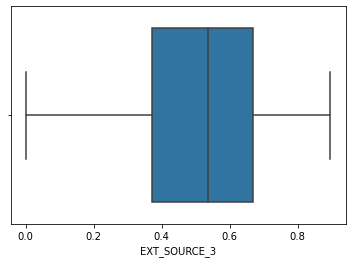

In [106]:
sns.boxplot(application_data.EXT_SOURCE_3)
plt.show()

In [107]:
mean= round(application_data.EXT_SOURCE_3.mean(),2)
median= round(application_data.EXT_SOURCE_3.median(),2)
mode= round(application_data.EXT_SOURCE_3.mode(),2)
print(f'mean= {mean}, median= {median}, mode= {mode}')

mean= 0.51, median= 0.54, mode= 0    0.75
dtype: float64


#### As there are very low outliers, we can replace the null with mean

In [108]:
application_data.EXT_SOURCE_3 = application_data.EXT_SOURCE_3.replace(np.NaN,mean)

In [109]:
application_data.EXT_SOURCE_3.isnull().sum()

0

#### Imputing AMT_REQ_CREDIT_BUREAU_YEAR

In [110]:
# OCCUPATION_TYPE is a continuous variable. We'll chechk for mode, and check for outliers
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

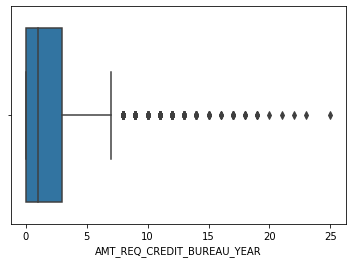

In [111]:
sns.boxplot(application_data.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

In [112]:
mean= round(application_data.AMT_REQ_CREDIT_BUREAU_YEAR.mean(),2)
median= round(application_data.AMT_REQ_CREDIT_BUREAU_YEAR.median(),2)
mode= round(application_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode(),2)
print(f'mean= {mean}, median= {median}, mode= {mode}')

mean= 1.9, median= 1.0, mode= 0    0.0
dtype: float64


#### As there are outliers, we can replace the null with median

In [113]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR = application_data.AMT_REQ_CREDIT_BUREAU_YEAR.replace(np.NaN,median)

In [114]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

#### Imputing AMT_REQ_CREDIT_BUREAU_QRT

In [115]:
# OCCUPATION_TYPE is a continuous variable. We'll chechk for mode, and check for outliers
application_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

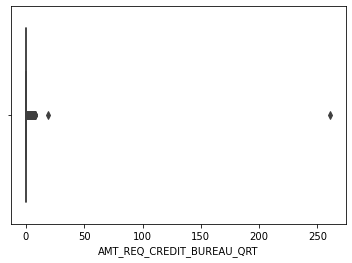

In [116]:
sns.boxplot(application_data.AMT_REQ_CREDIT_BUREAU_QRT)
plt.show()

In [117]:
mean= round(application_data.AMT_REQ_CREDIT_BUREAU_QRT.mean(),2)
median= round(application_data.AMT_REQ_CREDIT_BUREAU_QRT.median(),2)
mode= round(application_data.AMT_REQ_CREDIT_BUREAU_QRT.mode(),2)
print(f'mean= {mean}, median= {median}, mode= {mode}')

mean= 0.27, median= 0.0, mode= 0    0.0
dtype: float64


#### As there are outliers, we can replace the null with median

In [118]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT = application_data.AMT_REQ_CREDIT_BUREAU_QRT.replace(np.NaN,median)

In [119]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

#### Imputing ORGANIZATION_TYPE

In [120]:
# ORGANIZATION_TYPE is a not continuous variable. We'll chechk for mode, and check for outliers
application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [121]:
application_data.ORGANIZATION_TYPE.mode()

0    Business Entity Type 3
dtype: object

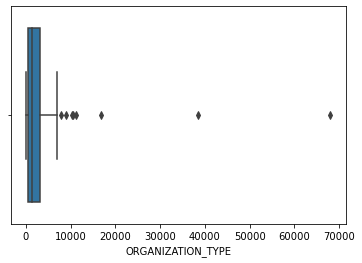

In [122]:
ot_ad= application_data.ORGANIZATION_TYPE.value_counts()
sns.boxplot(ot_ad)
plt.show()

#### As there are very low outliers, we can replace the null with mode

In [123]:
application_data.ORGANIZATION_TYPE = application_data.ORGANIZATION_TYPE.replace(np.NaN,'Business Entity Type 3')

In [124]:
application_data.ORGANIZATION_TYPE.isnull().sum()

0

In [125]:
ad_null_percentage = (application_data.isnull().sum()/len(application_data)*100).round(2)
ad_null_percentage.sort_values(ascending= False)

AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_4                 0.00
SK_ID_CURR                      0.00
FLAG_DOCUMENT_2                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_8                 0.00
EXT_SOURCE_3                    0.00
FLAG_DOCUMENT_7                 0.00
FLAG_DOCUMENT_12                0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
FLAG_DOCUMENT_11                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
FLAG_DOCUMENT_13                0.00
F

#### Imputing AMT_REQ_CREDIT_BUREAU_MON      

In [126]:
# AMT_REQ_CREDIT_BUREAU_MON is a not continuous variable. We'll chechk for mode, and check for outliers
application_data.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [127]:
application_data.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

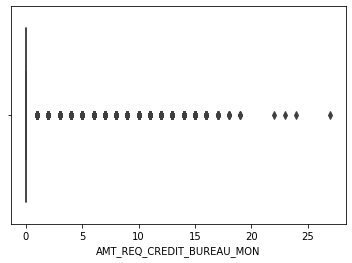

In [128]:
sns.boxplot(application_data.AMT_REQ_CREDIT_BUREAU_MON)
plt.show()

In [129]:
ad_amt_req_credit_bureau_mon_filter= application_data.AMT_REQ_CREDIT_BUREAU_MON[~application_data.AMT_REQ_CREDIT_BUREAU_MON.isnull()]
ad_amt_req_credit_bureau_mon_filter

0         0.0
1         0.0
2         0.0
4         0.0
5         0.0
         ... 
307503    1.0
307505    2.0
307508    1.0
307509    0.0
307510    2.0
Name: AMT_REQ_CREDIT_BUREAU_MON, Length: 265992, dtype: float64

In [130]:
ad_amt_req_credit_bureau_mon_filter.corr(target_ad,method= 'pearson')

-0.01246241922813863

#### As the outliers outliers are very high and the correlation is very low, we can drop this column from the analysis.

#### Imputing AMT_REQ_CREDIT_BUREAU_WEEK

In [131]:
# AMT_REQ_CREDIT_BUREAU_WEEK is a not continuous variable. We'll chechk for mode, and check for outliers
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [132]:
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

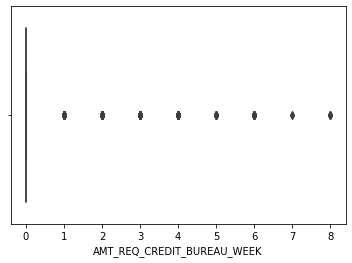

In [133]:
sns.boxplot(application_data.AMT_REQ_CREDIT_BUREAU_WEEK)
plt.show()

In [134]:
ad_amt_req_credit_bureau_week_filter= application_data.AMT_REQ_CREDIT_BUREAU_WEEK[~application_data.AMT_REQ_CREDIT_BUREAU_WEEK.isnull()]
ad_amt_req_credit_bureau_week_filter

0         0.0
1         0.0
2         0.0
4         0.0
5         0.0
         ... 
307503    0.0
307505    0.0
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, Length: 265992, dtype: float64

In [135]:
ad_amt_req_credit_bureau_week_filter.corr(target_ad,method= 'pearson')

0.0007877117489035163

#### As the outliers outliers are very high and the correlation is very low, we can drop this column from the analysis.

#### Imputing AMT_REQ_CREDIT_BUREAU_DAY

In [136]:
# AMT_REQ_CREDIT_BUREAU_DAY is a not continuous variable. We'll chechk for mode, and check for outliers
application_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

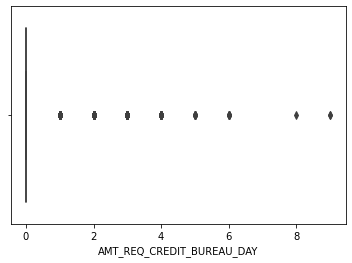

In [137]:
sns.boxplot(application_data.AMT_REQ_CREDIT_BUREAU_DAY)
plt.show()

In [138]:
ad_amt_req_credit_bureau_day_filter= application_data.AMT_REQ_CREDIT_BUREAU_DAY[~application_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull()]
ad_amt_req_credit_bureau_day_filter

0         0.0
1         0.0
2         0.0
4         0.0
5         0.0
         ... 
307503    0.0
307505    0.0
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, Length: 265992, dtype: float64

In [139]:
ad_amt_req_credit_bureau_day_filter.corr(target_ad,method= 'pearson')

0.0027044013780416717

#### As the outliers outliers are very high and the correlation is very low, we can drop this column from the analysis.

In [140]:
# replacing M and F in CODE_GENDER with Male and Female respectively 
application_data.CODE_GENDER.replace(['M','F'],['Male','Female'],inplace=True)

#### Assigning bins to the continous variable with numeric range.

In [141]:
# Binning 'AMT_INCOME_TOTAL' based on quantiles
application_data.AMT_INCOME_TOTAL = pd.qcut(application_data.AMT_INCOME_TOTAL, q=[0.0, 0.2, 0.4, 0.6, 0.8 , 1.0], labels=['Very Low', 'Low', "Noraml", 'High', 'Very High'])
application_data.AMT_INCOME_TOTAL.head(10)

0         High
1    Very High
2     Very Low
3          Low
4          Low
5     Very Low
6         High
7    Very High
8          Low
9          Low
Name: AMT_INCOME_TOTAL, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Noraml' < 'High' < 'Very High']

In [142]:
# Converting 'DAYS_BIRTH' to age years 
application_data.DAYS_BIRTH = (application_data.DAYS_BIRTH/365).astype(int)

In [143]:
application_data.DAYS_BIRTH.min()

-69

In [144]:
application_data.DAYS_BIRTH.max()

-20

#### As the birth years can never be negative hence converting all negative birth years to their repective absolute value.

In [145]:
application_data.DAYS_BIRTH = application_data.DAYS_BIRTH.abs()

In [146]:
application_data.DAYS_BIRTH.min()

20

In [147]:
application_data.DAYS_BIRTH.max()

69

In [148]:
# Biining 'DAYS_BIRTH'
application_data.DAYS_BIRTH_BINS = pd.cut(application_data.DAYS_BIRTH, bins=[18, 25, 40, 60, 80], labels=['Young', 'Adult', 'Middle Aged', 'Senior Citizen'])
application_data.DAYS_BIRTH_BINS.head()

0          Young
1    Middle Aged
2    Middle Aged
3    Middle Aged
4    Middle Aged
Name: DAYS_BIRTH, dtype: category
Categories (4, object): ['Young' < 'Adult' < 'Middle Aged' < 'Senior Citizen']

In [149]:
application_data.DAYS_BIRTH_BINS.value_counts()

Middle Aged       142220
Adult             119605
Senior Citizen     29368
Young              16318
Name: DAYS_BIRTH, dtype: int64

## Part B: Exploratory Data Analysis

## B.1 Analysis Overview

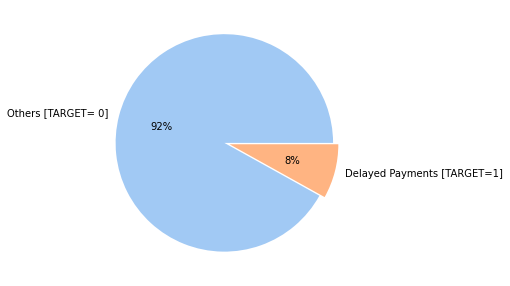

In [150]:
plt.figure(figsize=[8,5])
colors = sns.color_palette('pastel')[0:5]
plt.pie(application_data.TARGET.value_counts(normalize=True)*100, labels=['Others [TARGET= 0]', 'Delayed Payments [TARGET=1]'],colors= colors, explode=(0,0.05), autopct='%1.f%%')
plt.show()

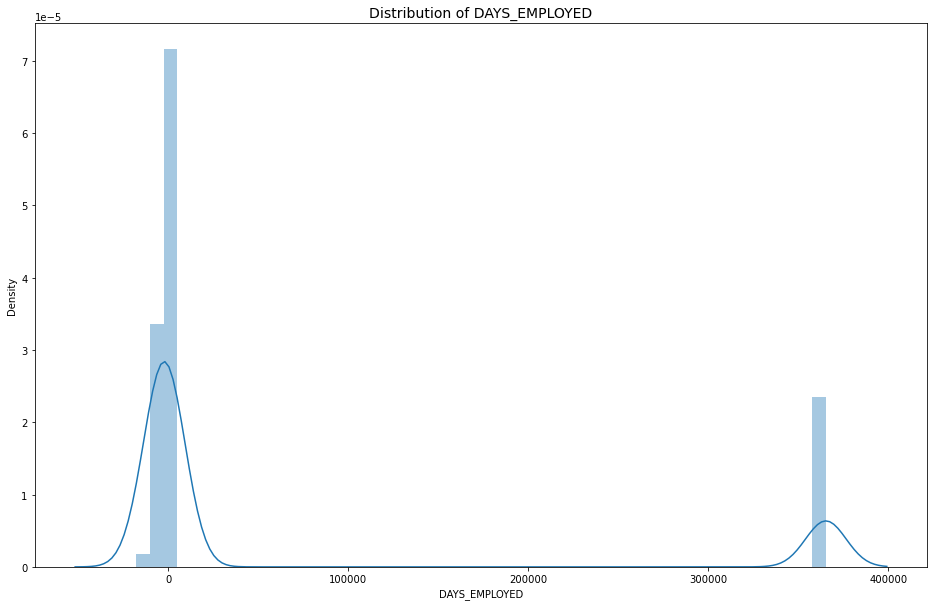

In [151]:
# distribution of 'DAYS_EMPLOYED'
plt.figure(figsize=[16,10])
colors = sns.color_palette('pastel')[0:5]
sns.distplot(application_data.DAYS_EMPLOYED)
plt.title('Distribution of DAYS_EMPLOYED', fontdict={'fontsize':14})
plt.show()

In [152]:
# 30 are selected based from the data base on relevance with problem statement for further analysis
final_columns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','DAYS_BIRTH','AMT_CREDIT','AMT_INCOME_TOTAL','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [153]:
application_data= application_data[final_columns]

#### Splitting into two data frame depending upon target values


In [154]:
ad_target0 = application_data.loc[application_data.TARGET == 0]
ad_target1 = application_data.loc[application_data.TARGET == 1]

## B.2 Univariate Analysis

## B.2.1 Categorical Data

In [155]:
def plotting(applicationdata, adtarget0, adtarget1, column):
    
    application_data = applicationdata
    ad_target0 = adtarget0
    ad_target1 = adtarget1
    col = column
    
    fig = plt.figure(figsize=(16,10))
    sns.set_theme(style="darkgrid")
    
    ax1 = plt.subplot(221)
    application_data[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for : '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue= 'TARGET', data= applicationdata, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((ad_target0[col].value_counts())/len(ad_target0))
    df['1']= ((ad_target1[col].value_counts())/len(ad_target1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')

    plt.show()

In [156]:
ad_categorical = application_data.select_dtypes(include=['object']).columns

Plotting:  CODE_GENDER


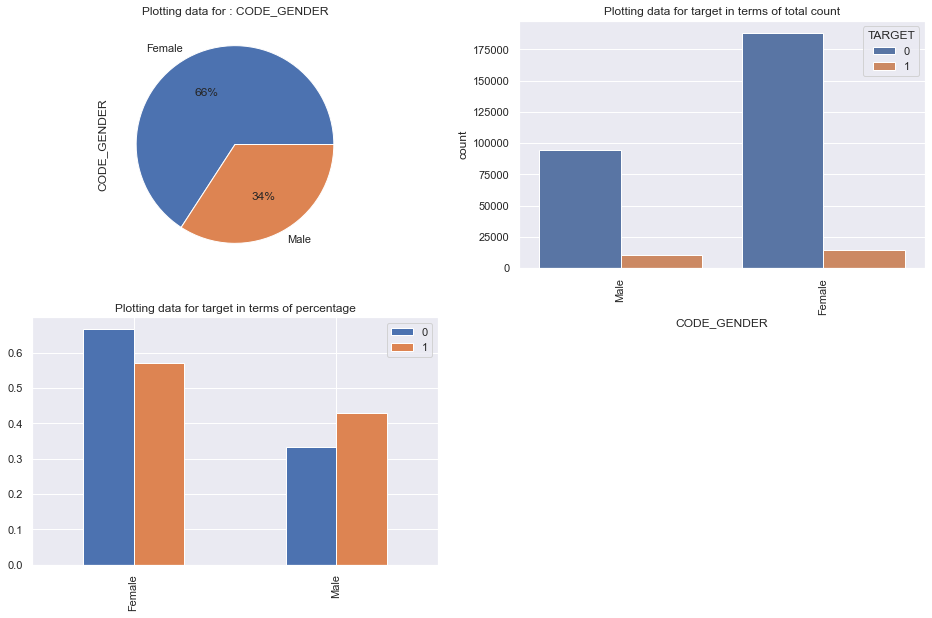

-------------------------------------------------------------------------------------------------------------------
Plotting:  FLAG_OWN_CAR


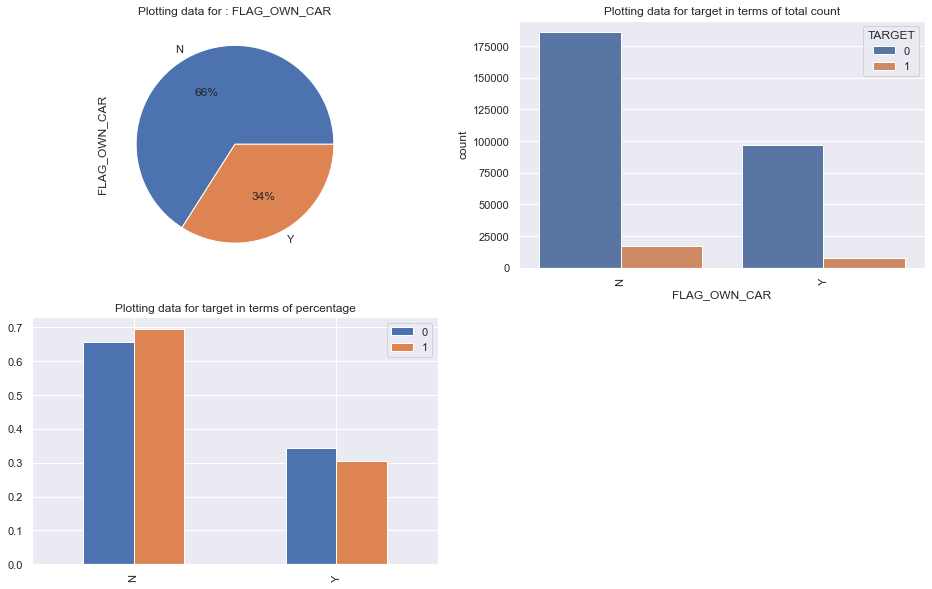

-------------------------------------------------------------------------------------------------------------------
Plotting:  FLAG_OWN_REALTY


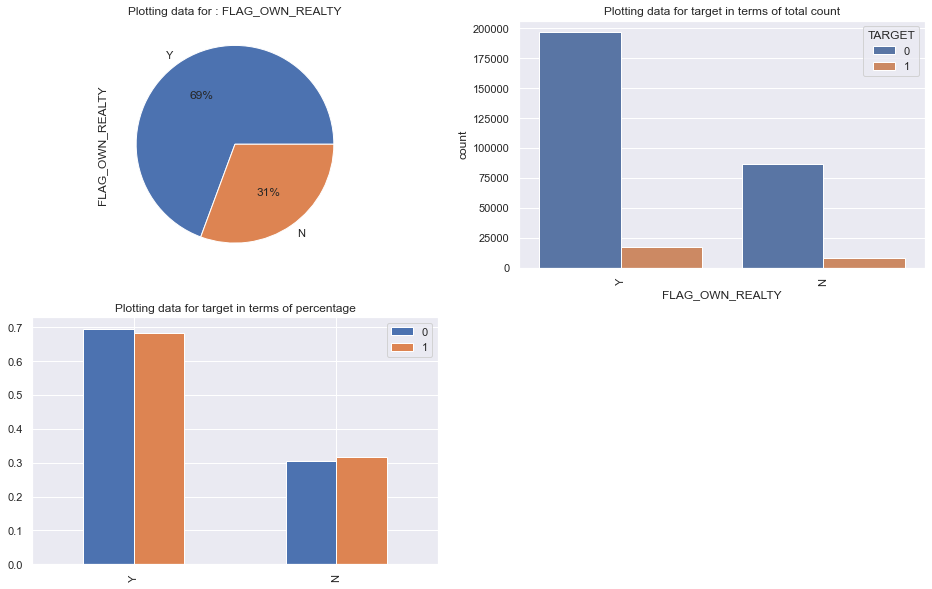

-------------------------------------------------------------------------------------------------------------------
Plotting:  NAME_INCOME_TYPE


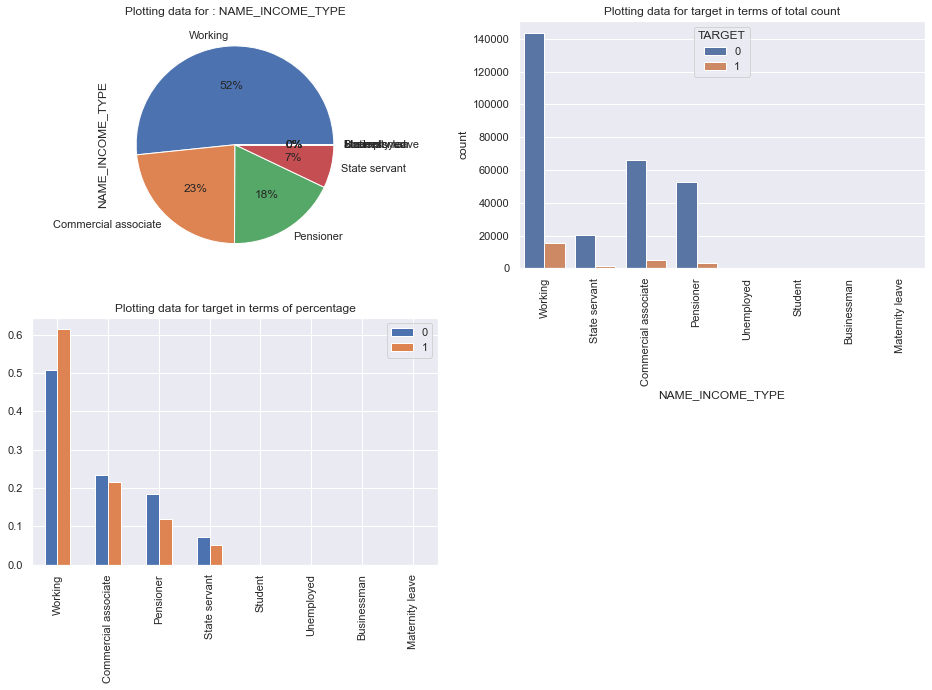

-------------------------------------------------------------------------------------------------------------------
Plotting:  NAME_EDUCATION_TYPE


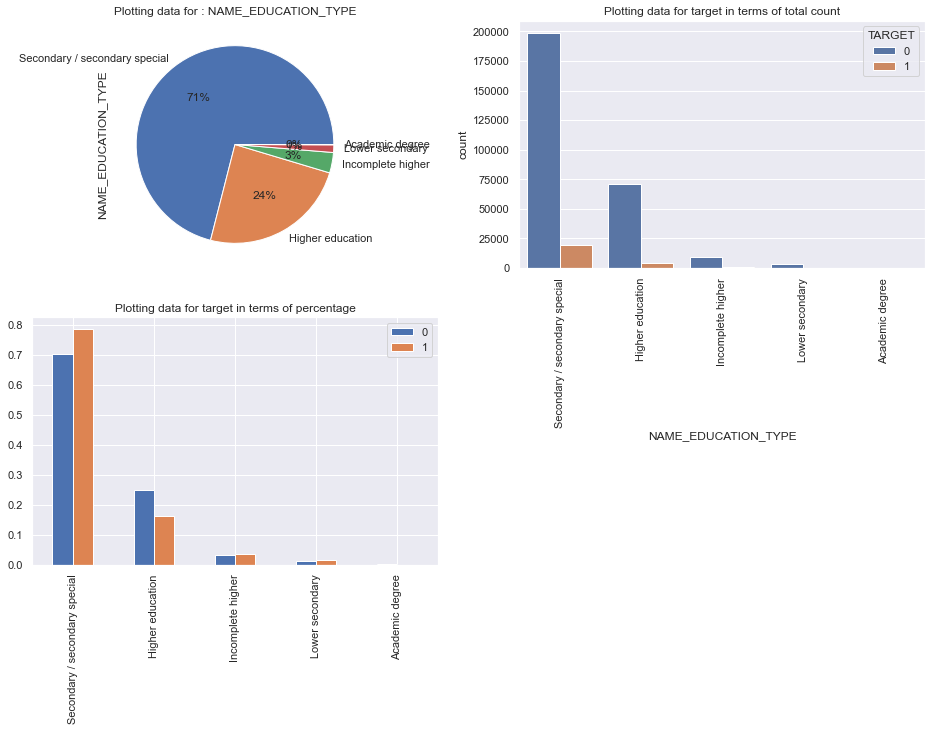

-------------------------------------------------------------------------------------------------------------------
Plotting:  NAME_FAMILY_STATUS


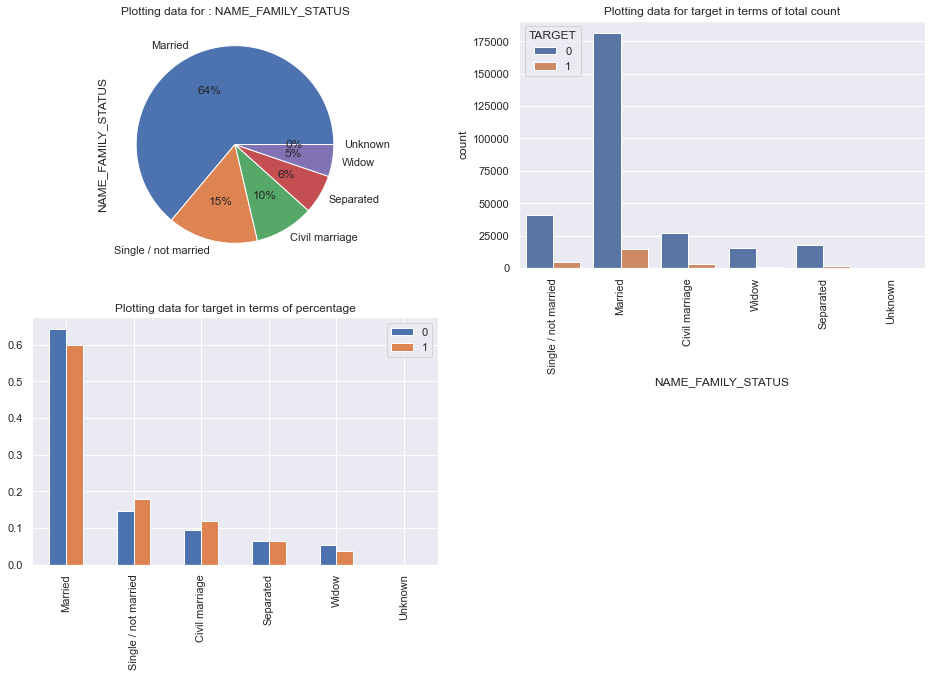

-------------------------------------------------------------------------------------------------------------------
Plotting:  NAME_HOUSING_TYPE


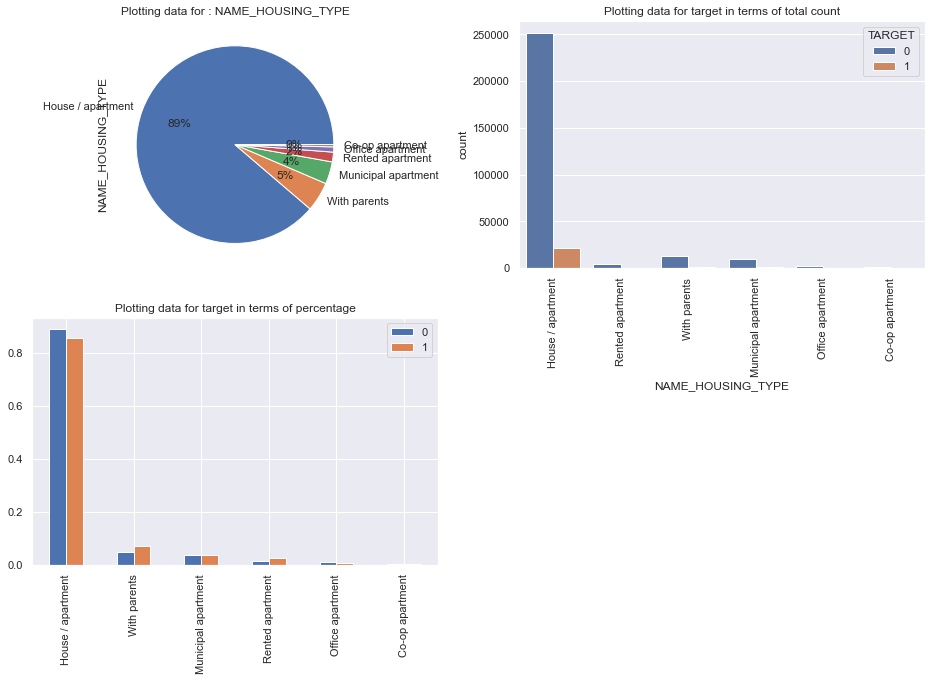

-------------------------------------------------------------------------------------------------------------------
Plotting:  OCCUPATION_TYPE


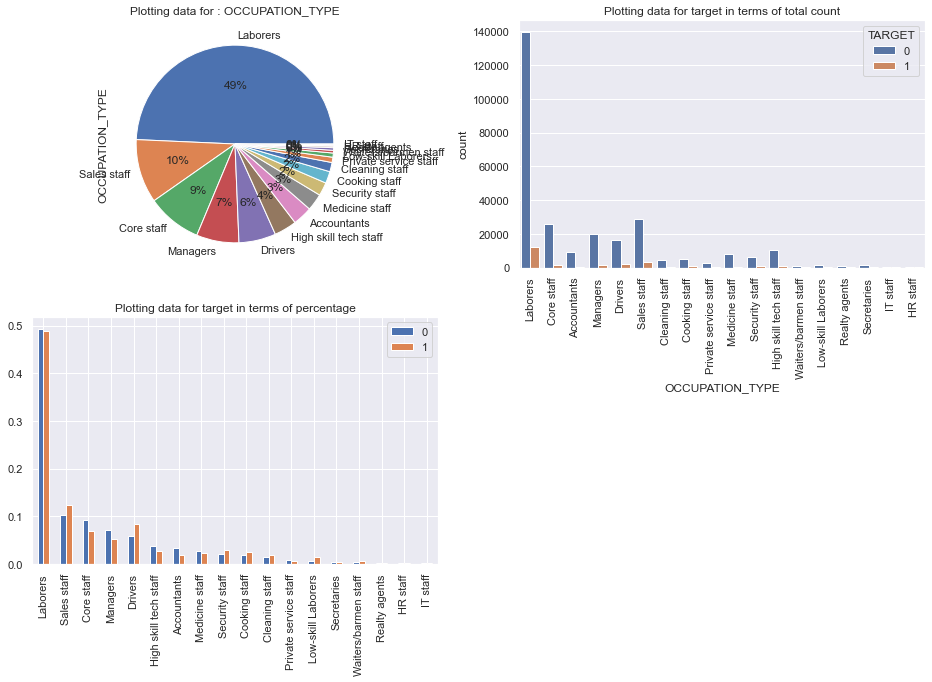

-------------------------------------------------------------------------------------------------------------------
Plotting:  ORGANIZATION_TYPE


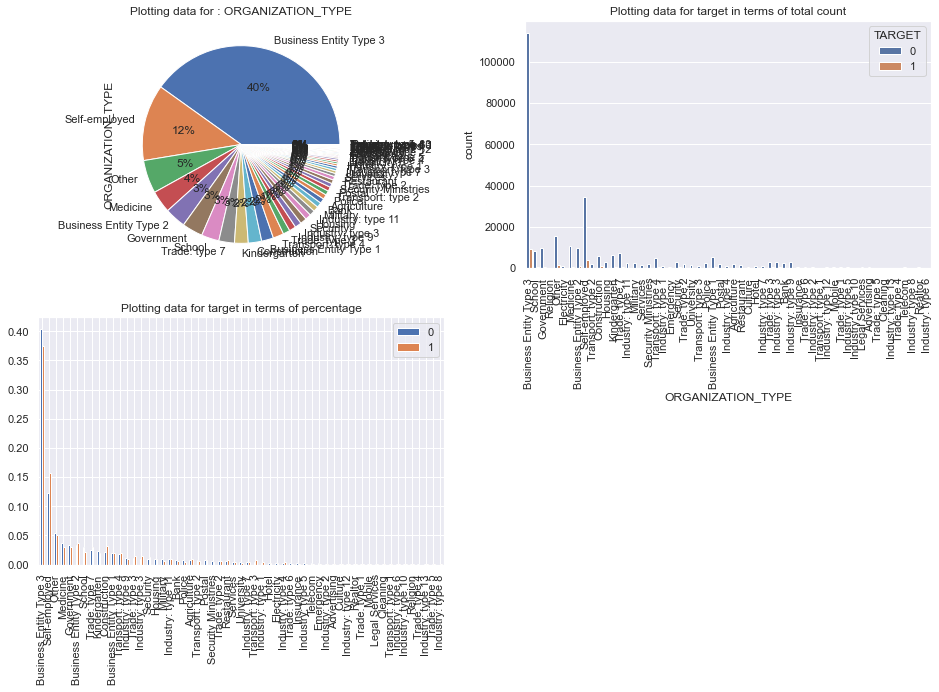

-------------------------------------------------------------------------------------------------------------------
Plotting:  NAME_CONTRACT_TYPE


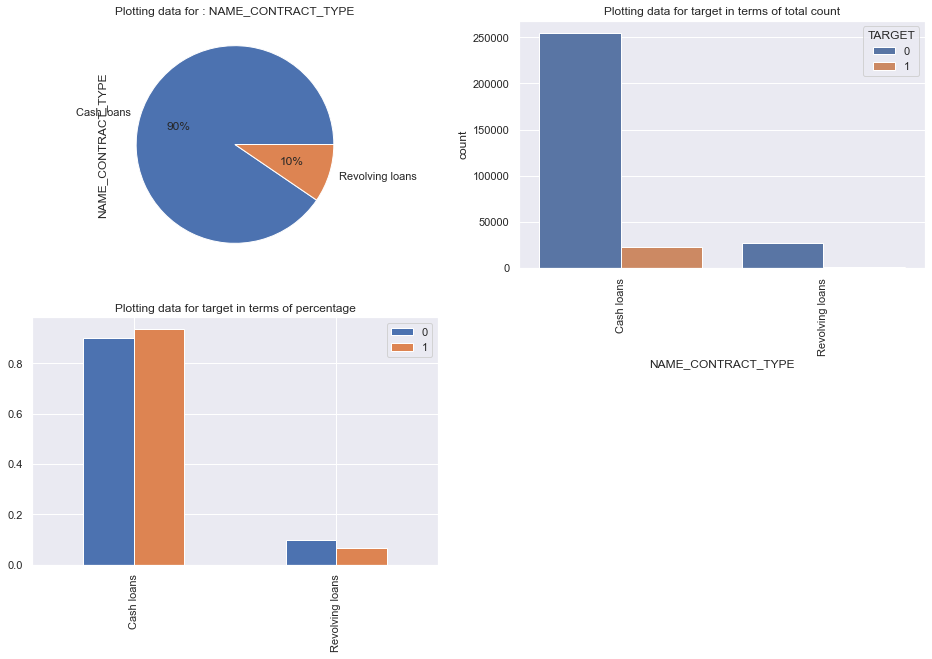

-------------------------------------------------------------------------------------------------------------------


In [157]:
for column in ad_categorical:
    print("Plotting: ", column)
    plotting(application_data, ad_target0, ad_target1, column)
    print('-------------------------------------------------------------------------------------------------------------------')

## B.2.2 Numerical Data

In [158]:
ad_numerical = application_data.select_dtypes(include=['int64', 'float64']).columns

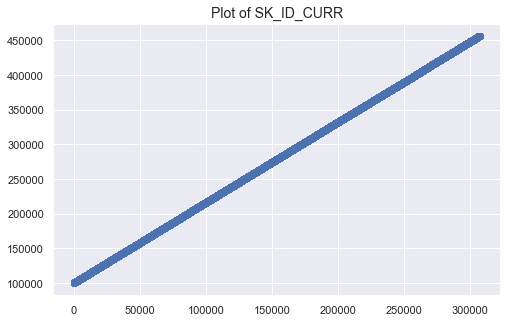

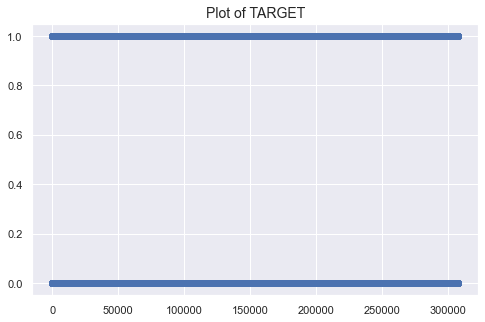

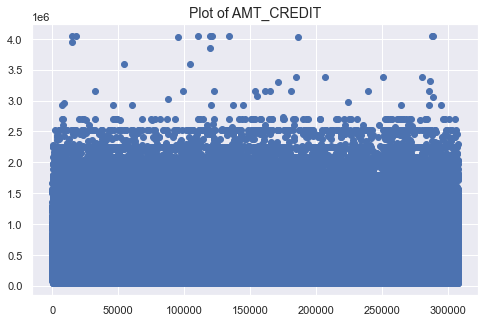

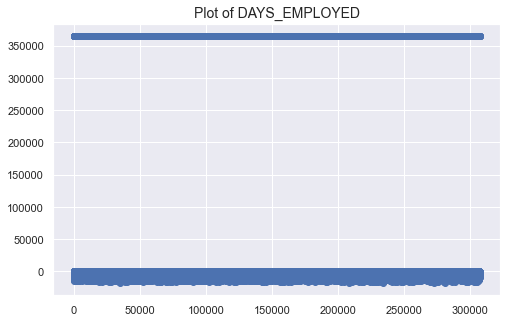

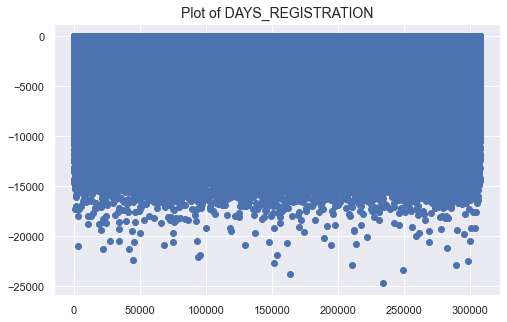

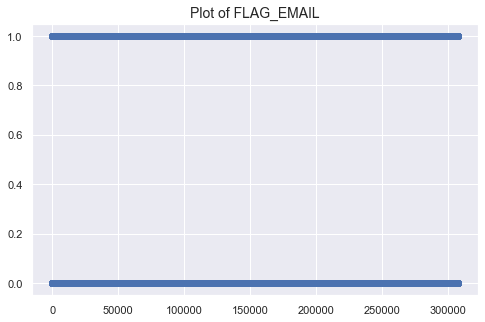

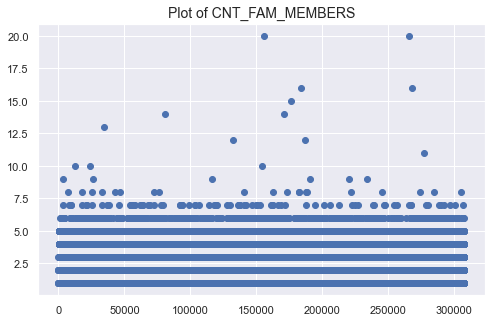

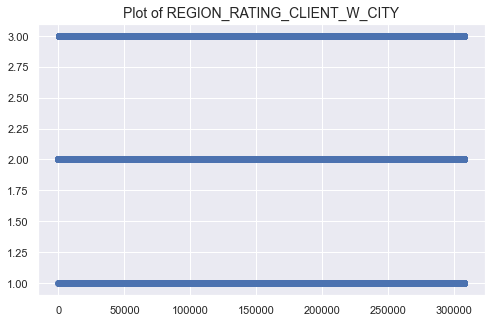

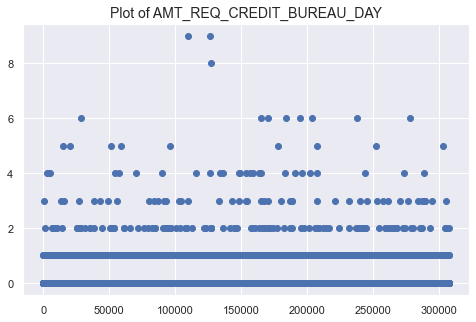

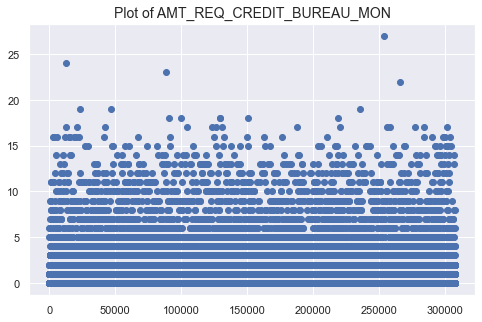

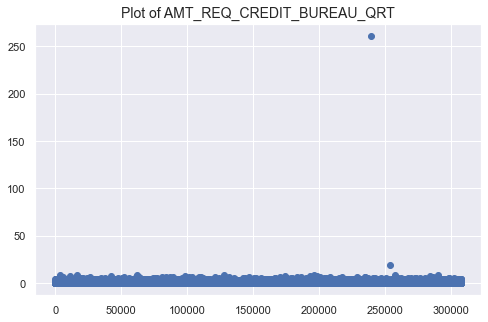

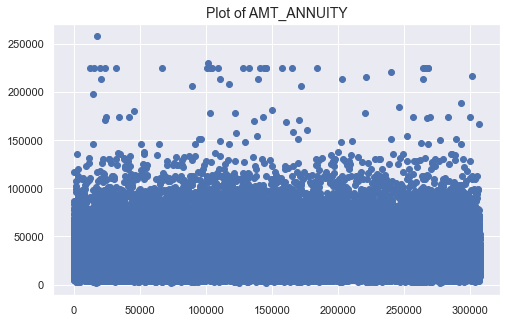

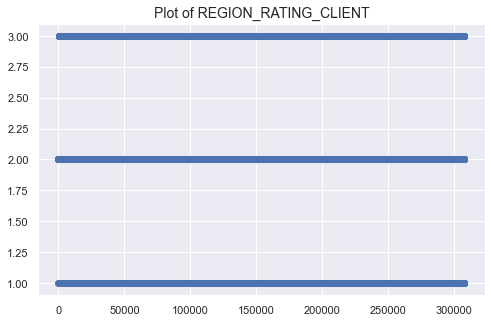

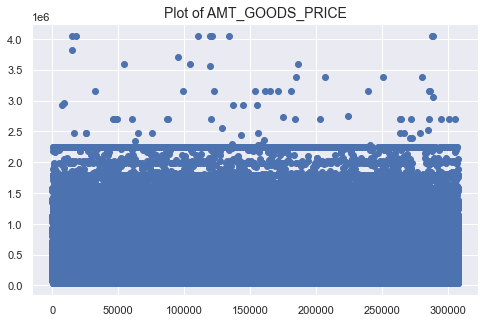

In [159]:
for column in ad_numerical:
    title = "Plot of "+column
    plt.figure(figsize= (8,5))
    plt.scatter(application_data.index, application_data[column])
    plt.title(title, fontdict={'fontsize':14})
    plt.show()

The analysis of the outliers is mainly based on the bussiness problem. And if the data does not have any error, removing the extreme value will be based on the bussiness need. By analysing the different plots, its seems that there are no error in reporting of the data. So, instead of removing those, we will just point out the columns which contain extreme values.

In [160]:
def plotting(applicationdata, adtarget0, adtarget1, column):
    
    application_data = applicationdata
    ad_target0 = adtarget0
    ad_target1 = adtarget1
    col = column
    
    fig = plt.figure(figsize=(16,10))
    sns.set_theme(style="darkgrid")
    
    ax1 = plt.subplot(221)
    plt.hist(ad_target0[column], alpha=0.5, label='0')
    plt.hist(ad_target1[column], alpha=0.5, label='1')
    
    ax2 = plt.subplot(222)
    sns.distplot(ad_target0[column].dropna(), label='0')
    sns.distplot(ad_target1[column].dropna(),  label='1')

    plt.show()

Plotting:  SK_ID_CURR


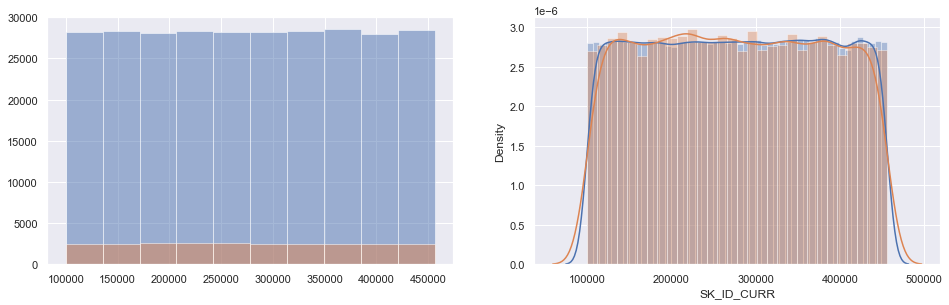

-------------------------------------------------------------------------------------------------------------------
Plotting:  TARGET


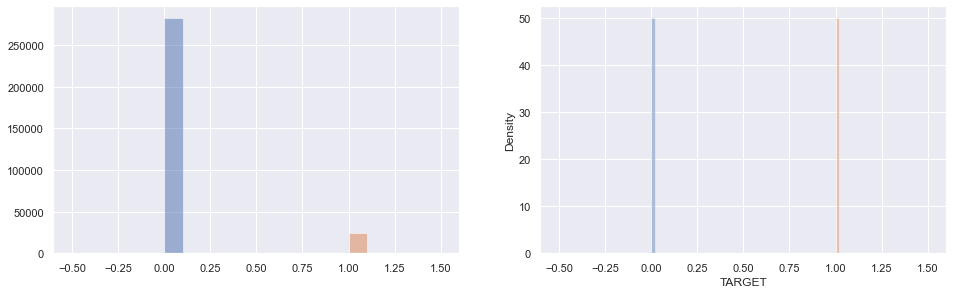

-------------------------------------------------------------------------------------------------------------------
Plotting:  AMT_CREDIT


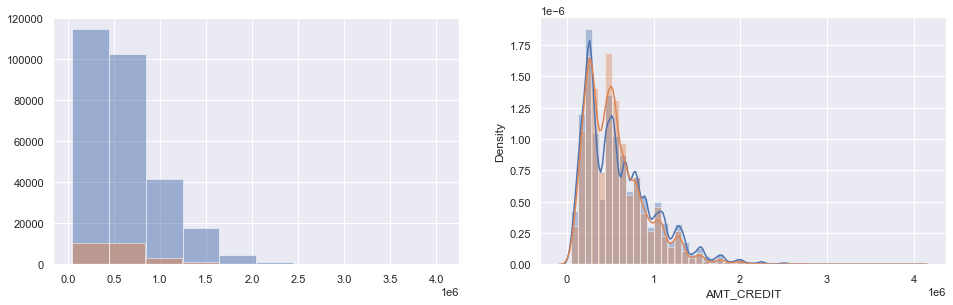

-------------------------------------------------------------------------------------------------------------------
Plotting:  DAYS_EMPLOYED


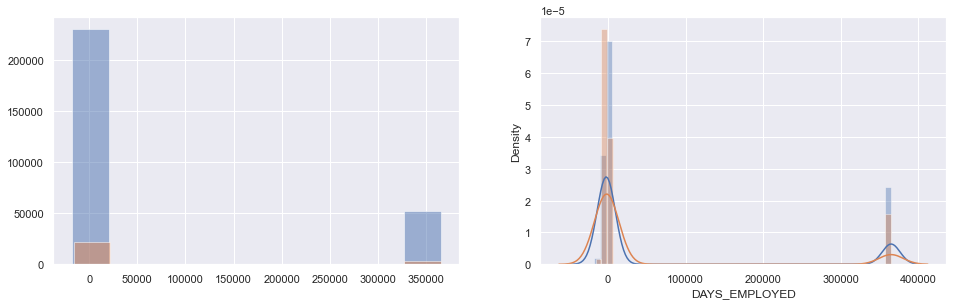

-------------------------------------------------------------------------------------------------------------------
Plotting:  DAYS_REGISTRATION


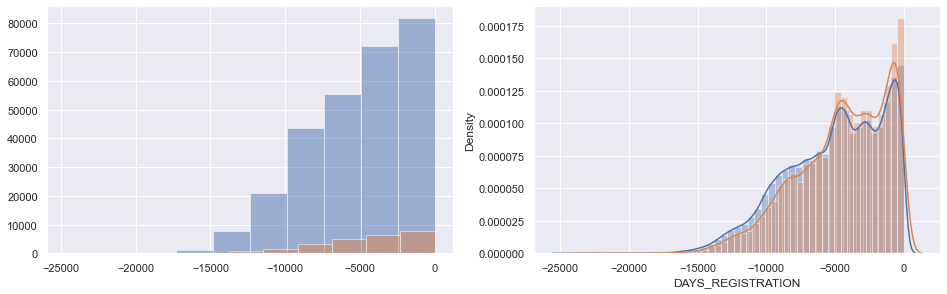

-------------------------------------------------------------------------------------------------------------------
Plotting:  FLAG_EMAIL


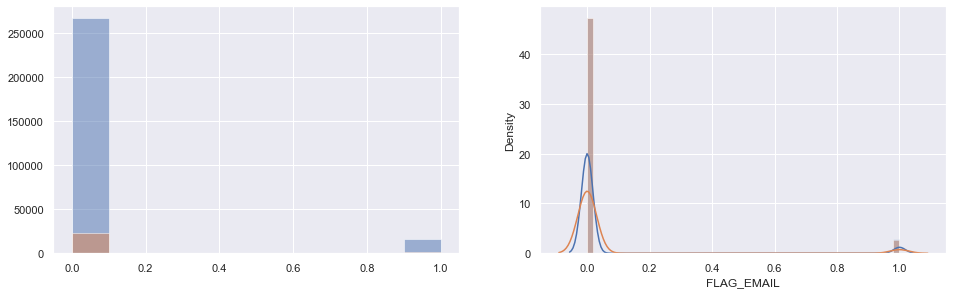

-------------------------------------------------------------------------------------------------------------------
Plotting:  CNT_FAM_MEMBERS


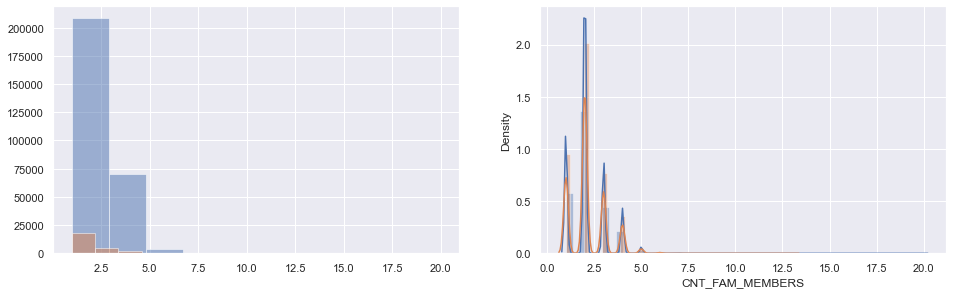

-------------------------------------------------------------------------------------------------------------------
Plotting:  REGION_RATING_CLIENT_W_CITY


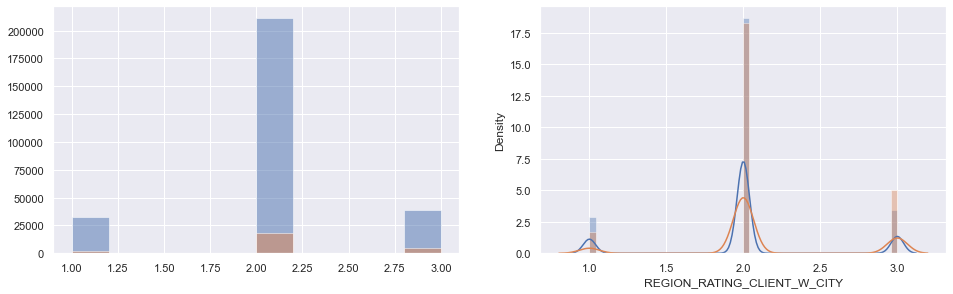

-------------------------------------------------------------------------------------------------------------------
Plotting:  AMT_REQ_CREDIT_BUREAU_DAY


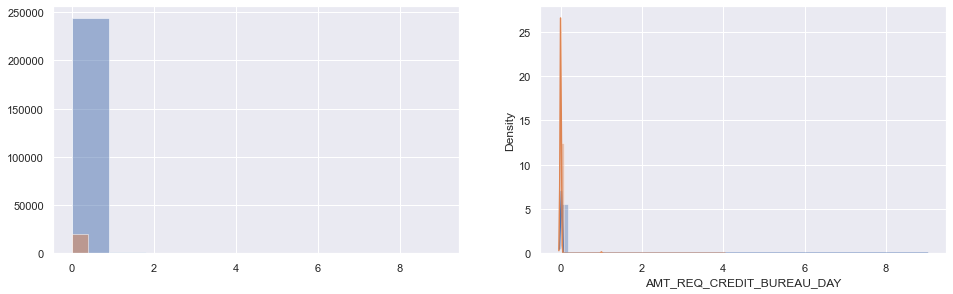

-------------------------------------------------------------------------------------------------------------------
Plotting:  AMT_REQ_CREDIT_BUREAU_MON


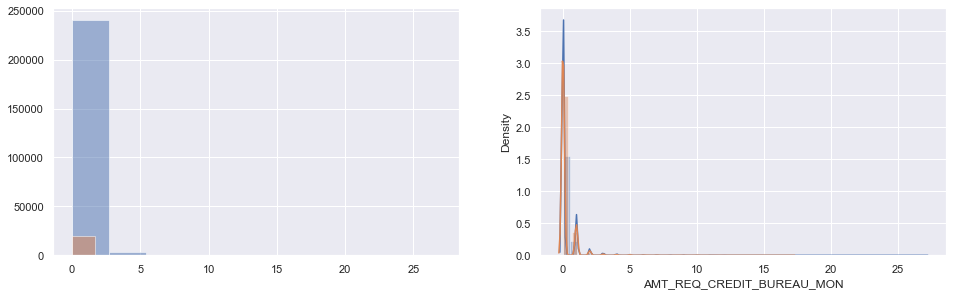

-------------------------------------------------------------------------------------------------------------------
Plotting:  AMT_REQ_CREDIT_BUREAU_QRT


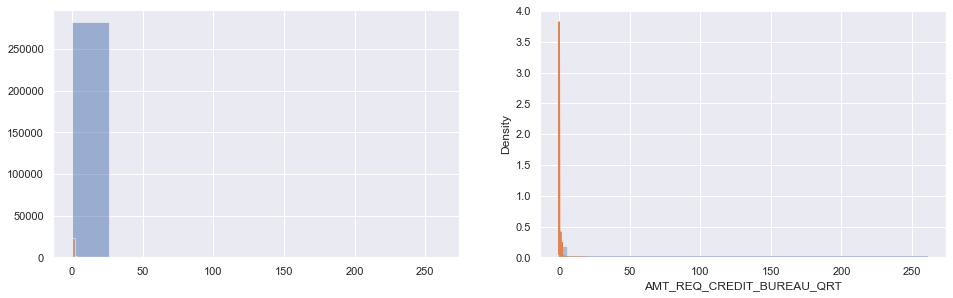

-------------------------------------------------------------------------------------------------------------------
Plotting:  AMT_ANNUITY


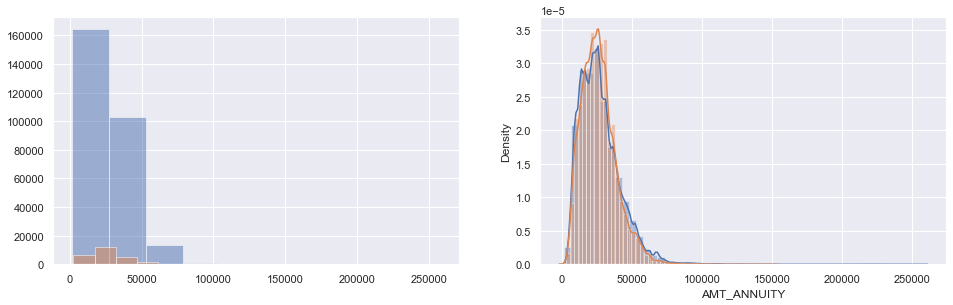

-------------------------------------------------------------------------------------------------------------------
Plotting:  REGION_RATING_CLIENT


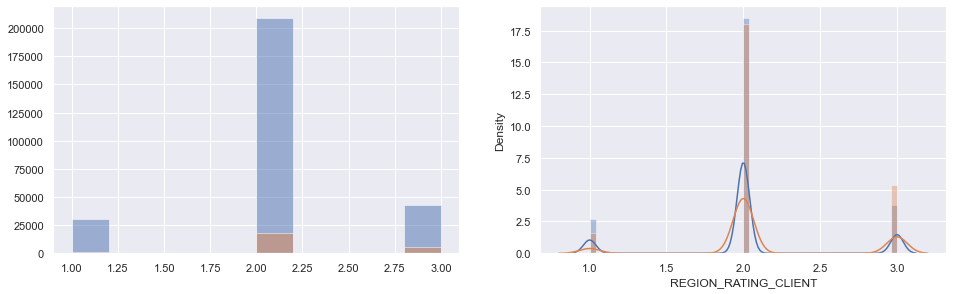

-------------------------------------------------------------------------------------------------------------------
Plotting:  AMT_GOODS_PRICE


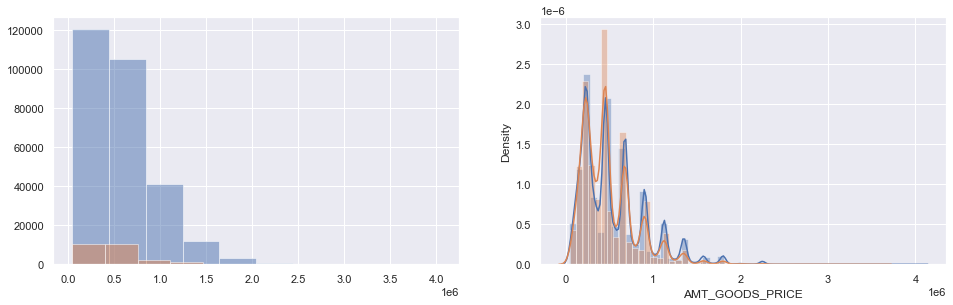

-------------------------------------------------------------------------------------------------------------------


In [161]:
for column in ad_numerical:
    print("Plotting: ", column)
    plotting(application_data, ad_target0, ad_target1, column)
    print('-------------------------------------------------------------------------------------------------------------------')

## B.3 Bivariate Analysis

## B.3.1 BIVARIATE ANALYSIS OF CATEGORICAL VS NUMERICAL VARIABLES

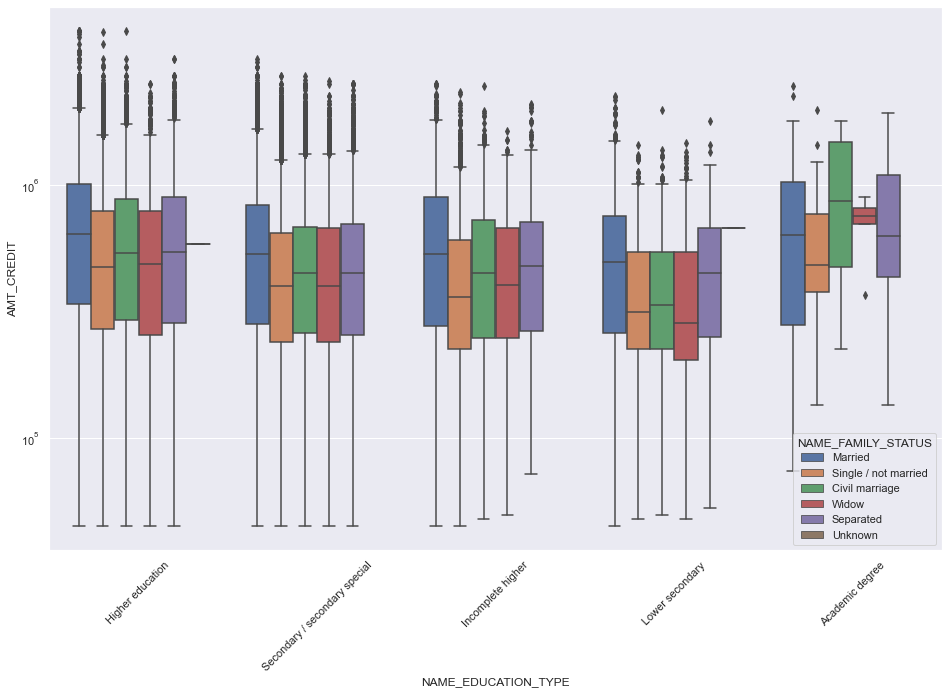

In [162]:
# 'NAME_EDUCATION_TYPE' VS 'AMT_CREDIT' for non-loan payment diffculties
plt.figure(figsize=(16,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data=ad_target0, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',orient='v')
plt.show()

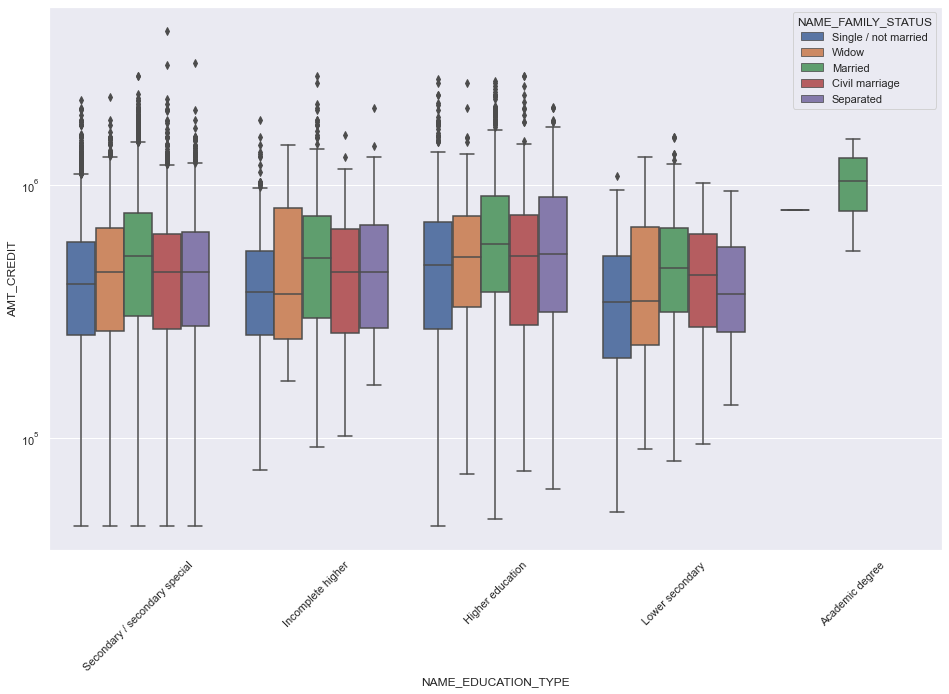

In [163]:
# 'NAME_EDUCATION_TYPE' VS 'AMT_CREDIT' for  loan payment diffculties
plt.figure(figsize=(16,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data=ad_target1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',orient='v')
plt.show()

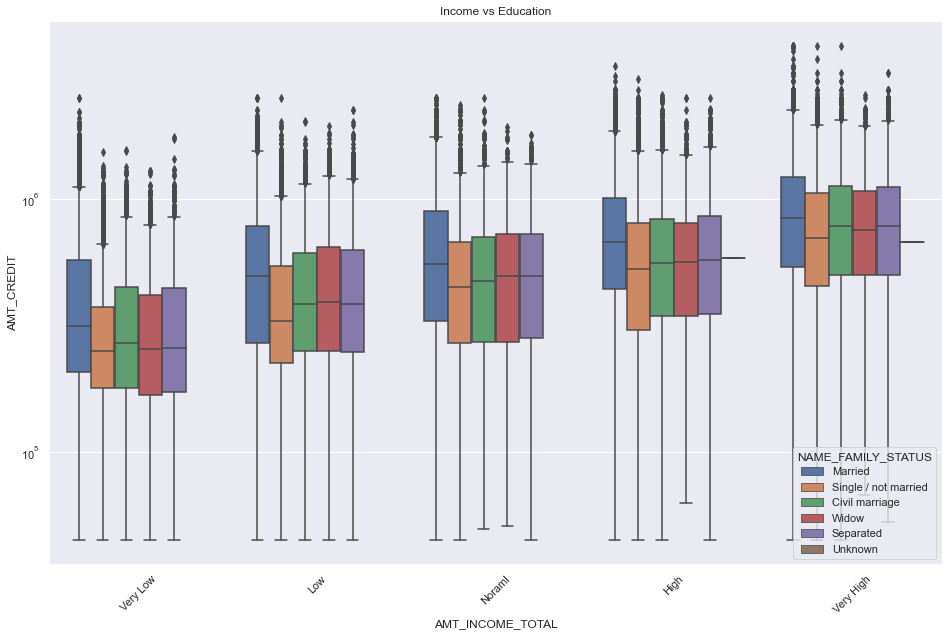

In [164]:
#'AMT_INCOME_TOTAL' vs 'AMT_CREDIT' for non-loan payment diffculties
plt.figure(figsize=(16,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data=ad_target0, x='AMT_INCOME_TOTAL', y='AMT_CREDIT',hue='NAME_FAMILY_STATUS', orient='v')
plt.title('Income vs Education')
plt.show()

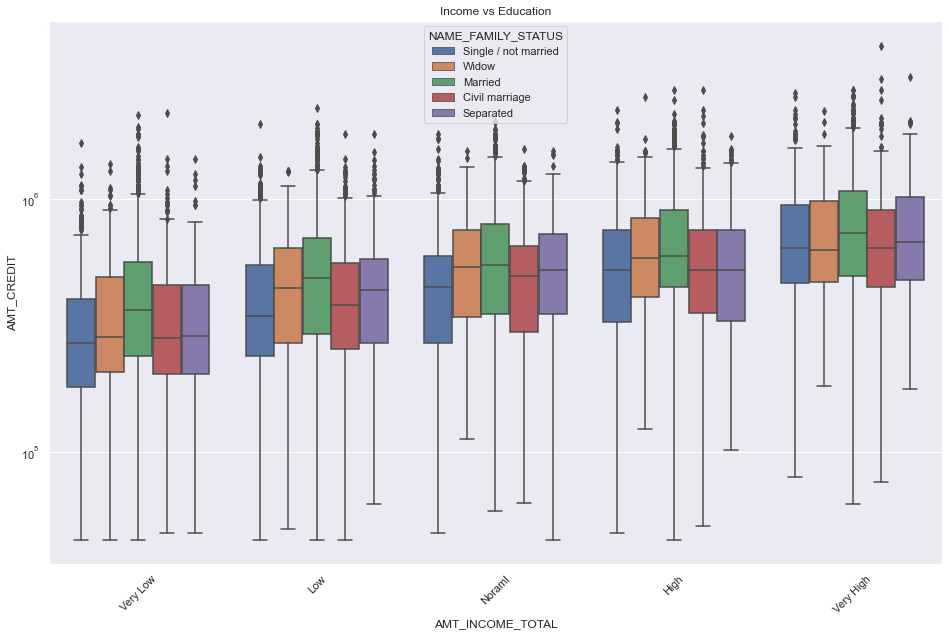

In [165]:
#'AMT_INCOME_TOTAL' vs 'AMT_CREDIT' for loan payment diffculties
plt.figure(figsize=(16,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data=ad_target1, x='AMT_INCOME_TOTAL', y='AMT_CREDIT',hue='NAME_FAMILY_STATUS', orient='v')
plt.title('Income vs Education')
plt.show()

## B.3.2 Bivariate Analysis of Categorical-Categorical 

In [166]:
from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff

import plotly
from plotly import tools
import plotly.express as px
from scipy.stats import boxcox
init_notebook_mode(connected=True)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [167]:
def biplot(df,feature,title):
    temp = df[feature].value_counts()
    
    perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    perc.sort_values(by='TARGET', ascending=False, inplace=True)

    fig = make_subplots(rows=1, cols=2,subplot_titles=("Count of "+ title,"% of loan payment difficulty"))


    fig.add_trace(go.Bar(x=temp.index, y=temp.values),row=1, col=1)
    fig.add_trace(go.Bar(x=perc[feature].to_list(), y=perc['TARGET'].to_list()),row=1, col=2)
    fig['layout']['xaxis']['title']=feature
    fig['layout']['xaxis2']['title']=feature
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']='% of Loan Payment Difficulties'
    fig.update_layout(height=500, width= 900, title_text=title, showlegend=False)
    fig.show()

In [168]:
#distribution of income total and the category with maximum loan-payment diffculties
biplot(application_data, 'AMT_INCOME_TOTAL','Income range')

#distribution of 'NAME_INCOME_TYPE' and the category with maximum loan-payment diffculties
biplot(application_data,'NAME_INCOME_TYPE','Income type')

#distribution of Contract type and the category with maximum loan-payment diffculties
biplot(application_data, 'NAME_CONTRACT_TYPE','Contract type')

#distribution of Education type and the category with maximum loan-payment diffculties
biplot(application_data, 'NAME_EDUCATION_TYPE', 'Education type')

#distribution of Occupation type and the category with maximum loan-payment diffculties
biplot(application_data,'OCCUPATION_TYPE', 'Occupation type')

In [169]:
pd.pivot_table(application_data, values='TARGET', index=['CODE_GENDER','AMT_INCOME_TOTAL'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

NAME_EDUCATION_TYPE           Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_TOTAL                                      
Female      Very Low                  0.00000          0.056068   
            Low                       0.00000          0.048995   
            Noraml                    0.00000          0.053780   
            High                      0.00000          0.048719   
            Very High                 0.09375          0.040119   
Male        Very Low                  0.00000          0.080411   
            Low                       0.00000          0.074449   
            Noraml                    0.00000          0.074796   
            High                      0.00000          0.068326   
            Very High                 0.00000          0.050901   

NAME_EDUCATION_TYPE           Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_TOTAL                                       
Female      Very Low                   0.086399         0.080193   
            Low                        0.080813         0.115160   
            Noraml                     0.095299         0.096330   
            High                       0.068446         0.096429   
            Very High                  0.076561         0.043478   
Male        Very Low                   0.123967         0.125000   
            Low                        0.103571         0.143469   
            Noraml                     0.072687         0.178161   
            High                       0.099125         0.134557   
            Very High                  0.075576         0.077519   

NAME_EDUCATION_TYPE           Secondary / secondary special  
CODE_GENDER AMT_INCOME_TOTAL                                 
Female      Very Low                               0.076778  
            Low                                    0.078816  
            Noraml                                 0.080406  
            High                                   0.074378  
            Very High                              0.069675  
Male        Very Low                               0.118066  
            Low                                    0.123617  
            Noraml                                 0.119750  
            High                                   0.111335  
            Very High                              0.092591

## B.3.3 BIVARIATE ANALYSIS OF NUMERICAL VS NUMERICAL VARIABLES

<Figure size 1152x720 with 0 Axes>

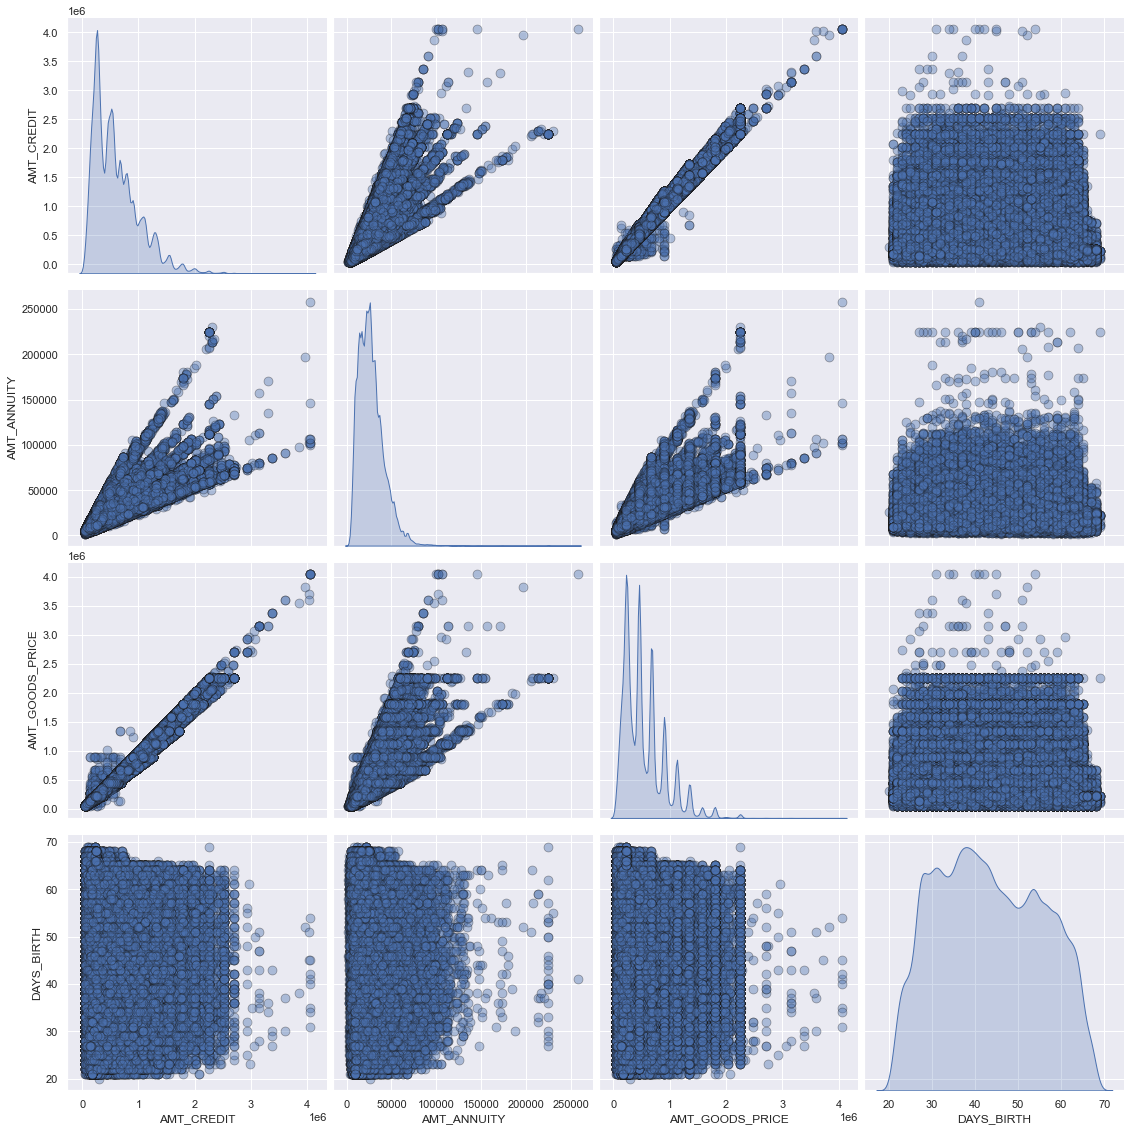

In [170]:
#pairplot for target1(LOAN  PAYMENT DIFFCULTIES)
plt.figure(figsize=[16,10])
sns.pairplot(application_data[['AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE' , 'DAYS_BIRTH']], diag_kind = 'kde', plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'}, size = 4)
plt.show()

## B.4 Top 10 correaltion

## B.4.1 Top 10 correaltion for client with payment diffculties

In [171]:
corr=ad_target1.corr(method='pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

In [172]:
corr_df.columns=['VAR1','VAR2','CORREALTION']
corr_df.dropna(subset=['CORREALTION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORREALTION'].abs()

In [173]:
corr_df.sort_values('CORR_ABS',ascending=False).head(10)

,VAR1,VAR2,CORREALTION,CORR_ABS
213,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
203,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956637,0.956637
222,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
183,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
62,DAYS_EMPLOYED,DAYS_BIRTH,0.575362,0.575362
77,DAYS_REGISTRATION,DAYS_BIRTH,-0.289116,0.289116
107,CNT_FAM_MEMBERS,DAYS_BIRTH,-0.203403,0.203403
79,DAYS_REGISTRATION,DAYS_EMPLOYED,-0.188929,0.188929
109,CNT_FAM_MEMBERS,DAYS_EMPLOYED,-0.186561,0.186561
110,CNT_FAM_MEMBERS,DAYS_REGISTRATION,0.145828,0.145828


## B.4.2 Top 10 correaltion for client without payment diffculties

In [174]:
corr=ad_target0.corr(method='pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

In [175]:
corr_df.columns=['VAR1','VAR2','CORREALTION']
corr_df.dropna(subset=['CORREALTION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORREALTION'].abs()

In [176]:
corr_df.sort_values('CORR_ABS',ascending=False).head(10)

,VAR1,VAR2,CORREALTION,CORR_ABS
213,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
203,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950149,0.950149
222,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
183,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
62,DAYS_EMPLOYED,DAYS_BIRTH,0.617967,0.617967
77,DAYS_REGISTRATION,DAYS_BIRTH,-0.333025,0.333025
107,CNT_FAM_MEMBERS,DAYS_BIRTH,-0.285806,0.285806
109,CNT_FAM_MEMBERS,DAYS_EMPLOYED,-0.237413,0.237413
79,DAYS_REGISTRATION,DAYS_EMPLOYED,-0.210187,0.210187
110,CNT_FAM_MEMBERS,DAYS_REGISTRATION,0.175630,0.175630


## B.5 Data Analysis of previous_application

In [177]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### We can use the data to understand or analyze whether it was successful or failure and if its sucessful whether the loan has been over or due.

In [178]:
previous_application.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

In [179]:
previous_application.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True)

Y    0.994926
N    0.005074
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

- keeping the last application of previous applications and drop off the remaining from the dataset

In [180]:
previous_application=previous_application[previous_application.FLAG_LAST_APPL_PER_CONTRACT=='Y']
previous_application.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True)

Y    1.0
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [181]:
previous_application.NFLAG_LAST_APPL_IN_DAY.value_counts(normalize=True)


1    0.999527
0    0.000473
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

In [182]:
#Sorting it based on application id as there are too many duplicates 
previous_application[previous_application.DAYS_TERMINATION > 0].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
17,1285768,142748,Revolving loans,9000.000,180000.0,180000.0,NaN,180000.0,FRIDAY,13,Y,1,NaN,NaN,NaN,XAP,Approved,-336,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,x-sell,AP+ (Cash loan),6,XNA,0.0,XNA,Card X-Sell,-277.0,-257.0,365243.0,365243.0,365243.0,0.0
21,1182516,267782,Cash loans,20361.600,405000.0,451777.5,NaN,405000.0,SATURDAY,4,Y,1,NaN,NaN,NaN,XNA,Approved,-686,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,30.0,low_normal,Cash X-Sell: low,365243.0,-656.0,214.0,365243.0,365243.0,1.0
34,1629736,255331,Revolving loans,10125.000,202500.0,202500.0,NaN,202500.0,SATURDAY,14,Y,1,NaN,NaN,NaN,XAP,Approved,-284,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,-265.0,-234.0,365243.0,365243.0,365243.0,0.0


In [183]:
previous_application.shape

(1661739, 37)

- The columns of interest in previous_application are `SK_ID_CURR`, `NAME_CONTRACT_STATUS`, `AMT_CREDIT`, `CODE_REJECT_REASON`, `NAME_YIELD_GROUP` and `DAYS_TERMINATION`. Keeping these columns and droping the rest.

In [184]:
previous_application1= previous_application[['SK_ID_CURR','NAME_CONTRACT_STATUS','AMT_CREDIT','CODE_REJECT_REASON','NAME_YIELD_GROUP','DAYS_TERMINATION']]
previous_application1.head()

,SK_ID_CURR,NAME_CONTRACT_STATUS,AMT_CREDIT,CODE_REJECT_REASON,NAME_YIELD_GROUP,DAYS_TERMINATION
0,271877,Approved,17145.0,XAP,middle,-37.0
1,108129,Approved,679671.0,XAP,low_action,365243.0
2,122040,Approved,136444.5,XAP,high,365243.0
3,176158,Approved,470790.0,XAP,middle,-177.0
4,202054,Refused,404055.0,HC,high,NaN


- Fixing exceptions in `DAYS_TERMINATION` column

In [185]:
previous_application1.DAYS_TERMINATION.value_counts(normalize=True)

 365243.0    0.226559
-233.0       0.000788
-170.0       0.000772
-184.0       0.000772
-163.0       0.000771
               ...   
-2808.0      0.000001
-2829.0      0.000001
-2847.0      0.000001
-2874.0      0.000001
-2815.0      0.000001
Name: DAYS_TERMINATION, Length: 2830, dtype: float64

In [186]:
previous_application1.DAYS_TERMINATION[previous_application1.DAYS_TERMINATION> 0].value_counts()


365243.0    225913
Name: DAYS_TERMINATION, dtype: int64

In [187]:
#XNA AND XAP ARE REPLACED BY NaN

previous_application1= previous_application1.replace('XNA',np.NaN)

#### MERGING THE PREVIOUS APPLICATION DATA SET TO CURRENT DATA SET SO THAT WE DONT LOSE ANY ENTRIES

In [188]:
application_data=pd.merge(left=application_data, right=previous_application1, how='left', left_on='SK_ID_CURR',right_on='SK_ID_CURR')
application_data.head(10)

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,AMT_CREDIT_x,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,NAME_CONTRACT_TYPE,AMT_ANNUITY,REGION_RATING_CLIENT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,AMT_CREDIT_y,CODE_REJECT_REASON,NAME_YIELD_GROUP,DAYS_TERMINATION
0,100002,1,Male,N,Y,25,406597.5,High,Working,Secondary / secondary special,Single / not married,House / apartment,-637,-3648.0,0,Laborers,1.0,2,Business Entity Type 3,0.0,0.0,0.0,Cash loans,24700.5,2,351000.0,Approved,179055.0,XAP,low_normal,-17.0
1,100003,0,Female,N,N,45,1293502.5,Very High,State servant,Higher education,Married,House / apartment,-1188,-1186.0,0,Core staff,2.0,1,School,0.0,0.0,0.0,Cash loans,35698.5,1,1129500.0,Approved,1035882.0,XAP,low_normal,-527.0
2,100003,0,Female,N,N,45,1293502.5,Very High,State servant,Higher education,Married,House / apartment,-1188,-1186.0,0,Core staff,2.0,1,School,0.0,0.0,0.0,Cash loans,35698.5,1,1129500.0,Approved,348637.5,XAP,middle,-639.0
3,100003,0,Female,N,N,45,1293502.5,Very High,State servant,Higher education,Married,House / apartment,-1188,-1186.0,0,Core staff,2.0,1,School,0.0,0.0,0.0,Cash loans,35698.5,1,1129500.0,Approved,68053.5,XAP,middle,-1976.0
4,100004,0,Male,Y,Y,52,135000.0,Very Low,Working,Secondary / secondary special,Single / not married,House / apartment,-225,-4260.0,0,Laborers,1.0,2,Government,0.0,0.0,0.0,Revolving loans,6750.0,2,135000.0,Approved,20106.0,XAP,middle,-714.0
5,100006,0,Female,N,Y,52,312682.5,Low,Working,Secondary / secondary special,Civil marriage,House / apartment,-3039,-9833.0,0,Laborers,2.0,2,Business Entity Type 3,NaN,NaN,0.0,Cash loans,29686.5,2,297000.0,Approved,675000.0,XAP,low_normal,-143.0
6,100006,0,Female,N,Y,52,312682.5,Low,Working,Secondary / secondary special,Civil marriage,House / apartment,-3039,-9833.0,0,Laborers,2.0,2,Business Entity Type 3,NaN,NaN,0.0,Cash loans,29686.5,2,297000.0,Canceled,0.0,XAP,NaN,NaN
7,100006,0,Female,N,Y,52,312682.5,Low,Working,Secondary / secondary special,Civil marriage,House / apartment,-3039,-9833.0,0,Laborers,2.0,2,Business Entity Type 3,NaN,NaN,0.0,Cash loans,29686.5,2,297000.0,Approved,267930.0,XAP,high,365243.0
8,100006,0,Female,N,Y,52,312682.5,Low,Working,Secondary / secondary special,Civil marriage,House / apartment,-3039,-9833.0,0,Laborers,2.0,2,Business Entity Type 3,NaN,NaN,0.0,Cash loans,29686.5,2,297000.0,Approved,270000.0,XAP,NaN,365243.0
9,100006,0,Female,N,Y,52,312682.5,Low,Working,Secondary / secondary special,Civil marriage,House / apartment,-3039,-9833.0,0,Laborers,2.0,2,Business Entity Type 3,NaN,NaN,0.0,Cash loans,29686.5,2,297000.0,Approved,481495.5,XAP,high,NaN


In [189]:
application_data.NAME_CONTRACT_STATUS.isna().mean()

0.011564187425017974

 ### filling the columns in NAME_CONTRACT_STATUS with first application

In [190]:
application_data.NAME_CONTRACT_STATUS.fillna('First Application', inplace=True)
application_data.NAME_CONTRACT_STATUS.isna().mean()

0.0

In [191]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422841 entries, 0 to 1422840
Data columns (total 31 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1422841 non-null  int64   
 1   TARGET                       1422841 non-null  int64   
 2   CODE_GENDER                  1422790 non-null  object  
 3   FLAG_OWN_CAR                 1422841 non-null  object  
 4   FLAG_OWN_REALTY              1422841 non-null  object  
 5   DAYS_BIRTH                   1422841 non-null  int32   
 6   AMT_CREDIT_x                 1422841 non-null  float64 
 7   AMT_INCOME_TOTAL             1422841 non-null  category
 8   NAME_INCOME_TYPE             1422841 non-null  object  
 9   NAME_EDUCATION_TYPE          1422841 non-null  object  
 10  NAME_FAMILY_STATUS           1422841 non-null  object  
 11  NAME_HOUSING_TYPE            1422841 non-null  object  
 12  DAYS_EMPLOYED               

## INSIGHTS 

- Females have shown better payment or credit behaviour, even if income was low as compared to the income of men creditors. 

- High income and high education categories are the best for loan. The applicants with low income or low skilled laborers are often tend to fall in the loan delayed payments eventually.

- The applicants with maximum percentage of loan payment diffculities are the most prone to fall as defaulters. Its has been observed that the loan has been approved to those who do not have or do not submit the required documents.

- Defaulters in peer groups of customers can be used as an indicator for credit payment patterns. 

- The category with low education should be considered to be under defaulters and should be taken care of while giving the loan so that they do not fall under loan payment diffculties.

- High income groups are preffered customers because of their payment repayment techinque for eg:-Managers, Accountants,and HRs have shown better credit payment patterns when compared to other groups such as the laborers.


- Self employed and business owners as the most categories which fall under the repayment diffculities.

- It can be observed that people with revolving loans and refused loans are the most defualters and are the driving factors for loan defaulters.The bank needs to strengthen its capabilties based on the documents procured, pay more attention to the low income category and continue to prefer higher income people who can pay the loan on time and not leave the bank at risk.
